# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from config import owm_key, gmap_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
coord = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1000000)
lng = np.random.uniform(low=-180.000, high=180.000, size=1000000)
coord = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for loc in coord:
    city = citipy.nearest_city(loc[0], loc[1])
    
    # If the city is unique, then add it to a our cities list
    if city.city_name.title() not in cities:
        cities.append(city.city_name.title())
        countries.append(city.country_code.upper())
        
# Print the city count to confirm sufficient count
len(cities)

22992

In [3]:
# Create dataframe
df = pd.DataFrame({
    'City': cities,
    'Country': countries   
})

df['Latitude'] = ""
df['Longitude'] = ""
df['Elevation'] = ""
df['Max Temp'] = ""
df['Humidity'] =  ""
df['Wind Speed'] = ""
df['Cloudiness'] = ""
df['Date'] = ""

df.head()

,City,Country,Latitude,Longitude,Elevation,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,Kapaa,US,,,,,,,,
1,Mataura,PF,,,,,,,,
2,Faanui,PF,,,,,,,,
3,Adrar,DZ,,,,,,,,
4,Yellowknife,CA,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
settings = {"units": "imperial", "appid": owm_key}
units = 'imperial'

print(f'ALL YOUR DATA ARE BELONG TO US.')
print('--------------------------------------')

errCount = 0
for index, row in df.iterrows():
    print(f'Processing record {index} of {len(cities)-1} | {row["City"]}, {row["Country"]}')
    city = row['City']
    country = row['Country']
    url = f'http://api.openweathermap.org/data/2.5/weather?&appid={owm_key}&q={city},{country}&units={units}'
    data = requests.get(url).json()
    try:
        df.loc[index, 'Latitude'] = data['coord']['lat']
        df.loc[index, 'Longitude'] = data['coord']['lon']
        df.loc[index, 'Max Temp'] = data['main']['temp_max']
        df.loc[index, 'Humidity'] = data['main']['humidity']
        df.loc[index, 'Wind Speed'] = data['wind']['speed']
        df.loc[index, 'Cloudiness'] = data['clouds']['all']
        df.loc[index, 'Date'] = data['dt']
    except (KeyError, IndexError):
        print(f'   Error due to crappy weather data, dropping record {index}.')
        df = df.drop(index=index)
        errCount += 1
    
print('--------------------------------------')         
print(f'WEATHER DATA RETRIEVAL COMPLETE WITH {errCount} ERRORS.')
print('--------------------------------------')

df = df.reset_index(drop=True)
df.to_csv('Output/Weather_Data.csv')

ALL YOUR DATA ARE BELONG TO US.
--------------------------------------
Processing record 0 of 22991 | Kapaa, US
Processing record 1 of 22991 | Mataura, PF
   Error due to crappy weather data, dropping record 1.
Processing record 2 of 22991 | Faanui, PF
Processing record 3 of 22991 | Adrar, DZ
Processing record 4 of 22991 | Yellowknife, CA
Processing record 5 of 22991 | Albany, AU
Processing record 6 of 22991 | Nuuk, GL
Processing record 7 of 22991 | Punta Arenas, CL
Processing record 8 of 22991 | Cockburn Town, TC
Processing record 9 of 22991 | Carnarvon, AU
Processing record 10 of 22991 | Ribeira Grande, PT
Processing record 11 of 22991 | Buala, SB
Processing record 12 of 22991 | Kapoeta, SD
   Error due to crappy weather data, dropping record 12.
Processing record 13 of 22991 | Saskylakh, RU
Processing record 14 of 22991 | Vestmannaeyjar, IS
Processing record 15 of 22991 | Tiarei, PF
Processing record 16 of 22991 | Victoria, SC
Processing record 17 of 22991 | Upington, ZA
Processing 

Processing record 153 of 22991 | Nara, ML
Processing record 154 of 22991 | Nadvoitsy, RU
Processing record 155 of 22991 | Horsham, AU
Processing record 156 of 22991 | Santa Cruz De La Palma, ES
Processing record 157 of 22991 | Ajdabiya, LY
Processing record 158 of 22991 | Broken Hill, AU
Processing record 159 of 22991 | Samusu, WS
   Error due to crappy weather data, dropping record 159.
Processing record 160 of 22991 | Arraial Do Cabo, BR
Processing record 161 of 22991 | Hobart, AU
Processing record 162 of 22991 | Great Falls, US
Processing record 163 of 22991 | Jiayuguan, CN
Processing record 164 of 22991 | Sinnamary, GF
Processing record 165 of 22991 | Bathsheba, BB
Processing record 166 of 22991 | Palmas Bellas, PA
Processing record 167 of 22991 | Kailua, US
Processing record 168 of 22991 | Kavieng, PG
Processing record 169 of 22991 | Kenai, US
Processing record 170 of 22991 | Lorengau, PG
Processing record 171 of 22991 | Toliary, MG
   Error due to crappy weather data, dropping re

   Error due to crappy weather data, dropping record 298.
Processing record 299 of 22991 | U Thong, TH
Processing record 300 of 22991 | Esmeraldas, EC
Processing record 301 of 22991 | Jalu, LY
Processing record 302 of 22991 | Iwanai, JP
Processing record 303 of 22991 | Isangel, VU
Processing record 304 of 22991 | Boyolangu, ID
Processing record 305 of 22991 | Chokurdakh, RU
Processing record 306 of 22991 | Palmer, US
Processing record 307 of 22991 | Haines Junction, CA
Processing record 308 of 22991 | Mega, ET
Processing record 309 of 22991 | Sao Joao Da Barra, BR
Processing record 310 of 22991 | Lolua, TV
   Error due to crappy weather data, dropping record 310.
Processing record 311 of 22991 | Araouane, ML
Processing record 312 of 22991 | Kolpny, RU
Processing record 313 of 22991 | Pinotepa Nacional, MX
   Error due to crappy weather data, dropping record 313.
Processing record 314 of 22991 | Rawson, AR
Processing record 315 of 22991 | Wattegama, LK
Processing record 316 of 22991 | H

Processing record 453 of 22991 | Marawi, SD
Processing record 454 of 22991 | Aripuana, BR
Processing record 455 of 22991 | Labytnangi, RU
Processing record 456 of 22991 | Yamada, JP
Processing record 457 of 22991 | Pavlodar, KZ
Processing record 458 of 22991 | Tarudant, MA
   Error due to crappy weather data, dropping record 458.
Processing record 459 of 22991 | Pisco, PE
Processing record 460 of 22991 | Netarhat, IN
Processing record 461 of 22991 | Pudozh, RU
Processing record 462 of 22991 | Bull Savanna, JM
Processing record 463 of 22991 | Verkh-Usugli, RU
Processing record 464 of 22991 | Yumen, CN
Processing record 465 of 22991 | Kalcheva, UA
Processing record 466 of 22991 | Porto Novo, CV
Processing record 467 of 22991 | Walvis Bay, NA
Processing record 468 of 22991 | Dong Xoai, VN
Processing record 469 of 22991 | Kattivakkam, IN
Processing record 470 of 22991 | Klaksvik, FO
Processing record 471 of 22991 | Hervey Bay, AU
Processing record 472 of 22991 | Port-Cartier, CA
Processing

   Error due to crappy weather data, dropping record 612.
Processing record 613 of 22991 | Potgietersrus, ZA
   Error due to crappy weather data, dropping record 613.
Processing record 614 of 22991 | Odweyne, SO
   Error due to crappy weather data, dropping record 614.
Processing record 615 of 22991 | Dingle, IE
Processing record 616 of 22991 | Montrose, GB
Processing record 617 of 22991 | Nogliki, RU
Processing record 618 of 22991 | Puerto Rico, CO
Processing record 619 of 22991 | Marystown, CA
Processing record 620 of 22991 | Madison, US
Processing record 621 of 22991 | Tawkar, SD
   Error due to crappy weather data, dropping record 621.
Processing record 622 of 22991 | Phangnga, TH
Processing record 623 of 22991 | Chistogorskiy, RU
Processing record 624 of 22991 | Belaya Gora, RU
Processing record 625 of 22991 | Sabla, BG
   Error due to crappy weather data, dropping record 625.
Processing record 626 of 22991 | Kashi, CN
Processing record 627 of 22991 | Kayerkan, RU
Processing recor

Processing record 766 of 22991 | Kendari, ID
Processing record 767 of 22991 | Mankono, CI
Processing record 768 of 22991 | Paris, US
Processing record 769 of 22991 | Garowe, SO
Processing record 770 of 22991 | Tilichiki, RU
Processing record 771 of 22991 | Salekhard, RU
Processing record 772 of 22991 | Abong Mbang, CM
Processing record 773 of 22991 | Mandalgovi, MN
Processing record 774 of 22991 | Gornyye Klyuchi, RU
Processing record 775 of 22991 | Tetouan, MA
Processing record 776 of 22991 | Maragogi, BR
Processing record 777 of 22991 | Laguna, BR
   Error due to crappy weather data, dropping record 777.
Processing record 778 of 22991 | Sur, OM
Processing record 779 of 22991 | Ngunguru, NZ
Processing record 780 of 22991 | Astipalaia, GR
   Error due to crappy weather data, dropping record 780.
Processing record 781 of 22991 | Smirnykh, RU
Processing record 782 of 22991 | Gushikawa, JP
Processing record 783 of 22991 | Alice Springs, AU
Processing record 784 of 22991 | Jinchang, CN
Pro

Processing record 926 of 22991 | Balotra, IN
Processing record 927 of 22991 | Bundaberg, AU
Processing record 928 of 22991 | Watsa, CD
Processing record 929 of 22991 | Hay River, CA
Processing record 930 of 22991 | Wewak, PG
Processing record 931 of 22991 | Benjamin Aceval, PY
Processing record 932 of 22991 | Namie, JP
Processing record 933 of 22991 | Omaruru, NA
Processing record 934 of 22991 | Inderborskiy, KZ
   Error due to crappy weather data, dropping record 934.
Processing record 935 of 22991 | General Pico, AR
Processing record 936 of 22991 | Nikolayevsk-Na-Amure, RU
Processing record 937 of 22991 | Ngukurr, AU
   Error due to crappy weather data, dropping record 937.
Processing record 938 of 22991 | Schroeder, BR
Processing record 939 of 22991 | Ponta Delgada, PT
Processing record 940 of 22991 | Markova, RU
Processing record 941 of 22991 | Calafell, ES
Processing record 942 of 22991 | Simbahan, PH
Processing record 943 of 22991 | Shimanovsk, RU
Processing record 944 of 22991 |

Processing record 1083 of 22991 | Quzhou, CN
Processing record 1084 of 22991 | Port Hueneme, US
Processing record 1085 of 22991 | Galle, LK
Processing record 1086 of 22991 | Teknaf, BD
Processing record 1087 of 22991 | Rawah, IQ
   Error due to crappy weather data, dropping record 1087.
Processing record 1088 of 22991 | Talara, PE
Processing record 1089 of 22991 | San Felipe, VE
Processing record 1090 of 22991 | Jacareacanga, BR
Processing record 1091 of 22991 | Puebloviejo, CO
Processing record 1092 of 22991 | Funadhoo, MV
Processing record 1093 of 22991 | Cap Malheureux, MU
Processing record 1094 of 22991 | Sfantu Gheorghe, RO
Processing record 1095 of 22991 | Palana, RU
Processing record 1096 of 22991 | Conceicao Da Barra, BR
Processing record 1097 of 22991 | Rungata, KI
   Error due to crappy weather data, dropping record 1097.
Processing record 1098 of 22991 | Cajamarca, PE
Processing record 1099 of 22991 | Aquin, HT
Processing record 1100 of 22991 | Abbeville, US
Processing recor

Processing record 1234 of 22991 | Ozgon, KG
   Error due to crappy weather data, dropping record 1234.
Processing record 1235 of 22991 | Santa Marta, CO
Processing record 1236 of 22991 | Laredo, US
Processing record 1237 of 22991 | Almeirim, BR
Processing record 1238 of 22991 | Molchanovo, RU
Processing record 1239 of 22991 | Camara De Lobos, PT
Processing record 1240 of 22991 | Zlitan, LY
Processing record 1241 of 22991 | Alashtar, IR
   Error due to crappy weather data, dropping record 1241.
Processing record 1242 of 22991 | Watrous, CA
Processing record 1243 of 22991 | Kanniyakumari, IN
Processing record 1244 of 22991 | Bereda, SO
   Error due to crappy weather data, dropping record 1244.
Processing record 1245 of 22991 | Reconquista, AR
Processing record 1246 of 22991 | Brownsville, US
Processing record 1247 of 22991 | Port Alberni, CA
Processing record 1248 of 22991 | Oktyabrskoye, RU
Processing record 1249 of 22991 | Miracema, BR
Processing record 1250 of 22991 | Kudahuvadhoo, MV

Processing record 1394 of 22991 | Ust-Kamchatsk, RU
   Error due to crappy weather data, dropping record 1394.
Processing record 1395 of 22991 | Nizhnedevitsk, RU
Processing record 1396 of 22991 | Belyy Yar, RU
Processing record 1397 of 22991 | Nizhniy Kuranakh, RU
Processing record 1398 of 22991 | Balkhash, KZ
Processing record 1399 of 22991 | Mbeya, TZ
Processing record 1400 of 22991 | Halalo, WF
   Error due to crappy weather data, dropping record 1400.
Processing record 1401 of 22991 | Sibolga, ID
Processing record 1402 of 22991 | Shihezi, CN
Processing record 1403 of 22991 | Dabwali, IN
Processing record 1404 of 22991 | Mangaratiba, BR
Processing record 1405 of 22991 | Talcahuano, CL
Processing record 1406 of 22991 | Tocopilla, CL
Processing record 1407 of 22991 | Maumere, ID
Processing record 1408 of 22991 | Praia, CV
Processing record 1409 of 22991 | Phalodi, IN
Processing record 1410 of 22991 | La Asuncion, VE
Processing record 1411 of 22991 | Chikoy, RU
   Error due to crappy 

Processing record 1543 of 22991 | Milak, IN
Processing record 1544 of 22991 | Bur Gabo, SO
   Error due to crappy weather data, dropping record 1544.
Processing record 1545 of 22991 | Terme, TR
Processing record 1546 of 22991 | Clinton, US
Processing record 1547 of 22991 | Boulder, US
Processing record 1548 of 22991 | Bronnoysund, NO
Processing record 1549 of 22991 | Krasnaya Gora, RU
Processing record 1550 of 22991 | Assiniboia, CA
Processing record 1551 of 22991 | Chumikan, RU
Processing record 1552 of 22991 | Oum Hadjer, TD
Processing record 1553 of 22991 | Sena Madureira, BR
Processing record 1554 of 22991 | Cucutilla, CO
Processing record 1555 of 22991 | Numan, NG
Processing record 1556 of 22991 | Bac Lieu, VN
   Error due to crappy weather data, dropping record 1556.
Processing record 1557 of 22991 | Tir Pol, AF
   Error due to crappy weather data, dropping record 1557.
Processing record 1558 of 22991 | Dmytrivka, UA
Processing record 1559 of 22991 | Nagykata, HU
Processing recor

Processing record 1700 of 22991 | Crato, BR
Processing record 1701 of 22991 | Siderno, IT
Processing record 1702 of 22991 | Fornosovo, RU
Processing record 1703 of 22991 | Honavar, IN
Processing record 1704 of 22991 | Reefton, NZ
   Error due to crappy weather data, dropping record 1704.
Processing record 1705 of 22991 | Ayan, RU
   Error due to crappy weather data, dropping record 1705.
Processing record 1706 of 22991 | Labuan, MY
Processing record 1707 of 22991 | Moranbah, AU
Processing record 1708 of 22991 | Karabuk, TR
Processing record 1709 of 22991 | Karkaralinsk, KZ
   Error due to crappy weather data, dropping record 1709.
Processing record 1710 of 22991 | Oyo, NG
Processing record 1711 of 22991 | Teya, RU
Processing record 1712 of 22991 | Ferrol, ES
Processing record 1713 of 22991 | Yingcheng, CN
Processing record 1714 of 22991 | Mandalgarh, IN
Processing record 1715 of 22991 | Petropavlovsk-Kamchatskiy, RU
Processing record 1716 of 22991 | Marsa Matruh, EG
Processing record 1

Processing record 1853 of 22991 | Emborion, GR
Processing record 1854 of 22991 | Belle Fourche, US
Processing record 1855 of 22991 | Katiola, CI
Processing record 1856 of 22991 | Soc Trang, VN
Processing record 1857 of 22991 | Mutis, CO
Processing record 1858 of 22991 | Letychiv, UA
Processing record 1859 of 22991 | Yuzhno-Yeniseyskiy, RU
   Error due to crappy weather data, dropping record 1859.
Processing record 1860 of 22991 | Esso, RU
Processing record 1861 of 22991 | Cedar City, US
Processing record 1862 of 22991 | Vega De Alatorre, MX
Processing record 1863 of 22991 | Sokolow Podlaski, PL
Processing record 1864 of 22991 | Istok, RU
Processing record 1865 of 22991 | Morros, BR
Processing record 1866 of 22991 | Kondopoga, RU
Processing record 1867 of 22991 | Dharmapuri, IN
Processing record 1868 of 22991 | Darlowo, PL
Processing record 1869 of 22991 | Mahishadal, IN
Processing record 1870 of 22991 | Bealanana, MG
Processing record 1871 of 22991 | Cherepovets, RU
Processing record 1

Processing record 2009 of 22991 | Creel, MX
Processing record 2010 of 22991 | Campobasso, IT
Processing record 2011 of 22991 | Novomikhaylovskiy, RU
Processing record 2012 of 22991 | Achisay, KZ
   Error due to crappy weather data, dropping record 2012.
Processing record 2013 of 22991 | Rafaela, AR
Processing record 2014 of 22991 | French Harbor, HN
Processing record 2015 of 22991 | Melfort, CA
Processing record 2016 of 22991 | Grass Valley, US
Processing record 2017 of 22991 | Amursk, RU
Processing record 2018 of 22991 | Finnsnes, NO
Processing record 2019 of 22991 | Novyy Urengoy, RU
Processing record 2020 of 22991 | Ternate, ID
Processing record 2021 of 22991 | Kommunarka, RU
Processing record 2022 of 22991 | Gilazi, AZ
   Error due to crappy weather data, dropping record 2022.
Processing record 2023 of 22991 | Tibu, CO
Processing record 2024 of 22991 | Ocampo, MX
Processing record 2025 of 22991 | Chiredzi, ZW
Processing record 2026 of 22991 | Zaqatala, AZ
Processing record 2027 of 

Processing record 2159 of 22991 | Apatity, RU
Processing record 2160 of 22991 | Vannes, FR
Processing record 2161 of 22991 | Jundubah, TN
   Error due to crappy weather data, dropping record 2161.
Processing record 2162 of 22991 | Nisia Floresta, BR
Processing record 2163 of 22991 | Aktash, RU
Processing record 2164 of 22991 | Seabra, BR
Processing record 2165 of 22991 | Koundara, GN
Processing record 2166 of 22991 | Labutta, MM
   Error due to crappy weather data, dropping record 2166.
Processing record 2167 of 22991 | Loubomo, CG
   Error due to crappy weather data, dropping record 2167.
Processing record 2168 of 22991 | Najran, SA
Processing record 2169 of 22991 | Breyten, ZA
Processing record 2170 of 22991 | Camalu, MX
Processing record 2171 of 22991 | Gulshat, KZ
   Error due to crappy weather data, dropping record 2171.
Processing record 2172 of 22991 | Keffi, NG
Processing record 2173 of 22991 | Zheleznodorozhnyy, RU
Processing record 2174 of 22991 | Kwaluseni, SZ
Processing rec

Processing record 2309 of 22991 | Marakkanam, IN
Processing record 2310 of 22991 | Felanitx, ES
Processing record 2311 of 22991 | Ovalle, CL
Processing record 2312 of 22991 | Kyaikkami, MM
Processing record 2313 of 22991 | San Rafael, AR
Processing record 2314 of 22991 | Antsirabe, MG
Processing record 2315 of 22991 | Aberfeldy, GB
Processing record 2316 of 22991 | Serov, RU
Processing record 2317 of 22991 | Beaufort, US
Processing record 2318 of 22991 | Abbotsford, CA
Processing record 2319 of 22991 | Geresk, AF
   Error due to crappy weather data, dropping record 2319.
Processing record 2320 of 22991 | Charlestown, US
Processing record 2321 of 22991 | Ondorhaan, MN
   Error due to crappy weather data, dropping record 2321.
Processing record 2322 of 22991 | Contamana, PE
Processing record 2323 of 22991 | Ordynskoye, RU
Processing record 2324 of 22991 | Qeshm, IR
Processing record 2325 of 22991 | Forestville, CA
Processing record 2326 of 22991 | Bhag, PK
Processing record 2327 of 22991

Processing record 2456 of 22991 | Herat, AF
Processing record 2457 of 22991 | Lyaskelya, RU
Processing record 2458 of 22991 | Narrabri, AU
Processing record 2459 of 22991 | Baft, IR
Processing record 2460 of 22991 | Tongliao, CN
Processing record 2461 of 22991 | Abalak, NE
Processing record 2462 of 22991 | Nileshwar, IN
Processing record 2463 of 22991 | Pasni, PK
Processing record 2464 of 22991 | Chiriguana, CO
Processing record 2465 of 22991 | Ust-Maya, RU
Processing record 2466 of 22991 | Podgornoye, RU
Processing record 2467 of 22991 | Sredec, BG
   Error due to crappy weather data, dropping record 2467.
Processing record 2468 of 22991 | Dumka, IN
Processing record 2469 of 22991 | Progreso, MX
Processing record 2470 of 22991 | Pingtung, TW
Processing record 2471 of 22991 | Kenora, CA
Processing record 2472 of 22991 | Karibib, NA
Processing record 2473 of 22991 | Delano, US
Processing record 2474 of 22991 | Tupik, RU
Processing record 2475 of 22991 | Colesberg, ZA
Processing record 2

Processing record 2617 of 22991 | Beamsville, CA
Processing record 2618 of 22991 | Lere, NG
Processing record 2619 of 22991 | Kefamenanu, ID
Processing record 2620 of 22991 | Sohag, EG
Processing record 2621 of 22991 | Hinton, CA
Processing record 2622 of 22991 | Tabialan, PH
   Error due to crappy weather data, dropping record 2622.
Processing record 2623 of 22991 | Jinka, ET
Processing record 2624 of 22991 | Pouembout, NC
Processing record 2625 of 22991 | Weyburn, CA
Processing record 2626 of 22991 | Payo, PH
   Error due to crappy weather data, dropping record 2626.
Processing record 2627 of 22991 | Junin, AR
Processing record 2628 of 22991 | Kankan, GN
Processing record 2629 of 22991 | Bueu, ES
Processing record 2630 of 22991 | Iskilip, TR
Processing record 2631 of 22991 | Numazu, JP
Processing record 2632 of 22991 | Kashmor, PK
Processing record 2633 of 22991 | Aniva, RU
Processing record 2634 of 22991 | Latung, PH
Processing record 2635 of 22991 | Porto Belo, BR
Processing record

Processing record 2768 of 22991 | Kindberg, AT
Processing record 2769 of 22991 | Scalloway, GB
   Error due to crappy weather data, dropping record 2769.
Processing record 2770 of 22991 | Nizhnevartovsk, RU
Processing record 2771 of 22991 | Kaduna, NG
Processing record 2772 of 22991 | Trelew, AR
Processing record 2773 of 22991 | Katangi, IN
Processing record 2774 of 22991 | Rennes, FR
Processing record 2775 of 22991 | Encruzilhada, BR
Processing record 2776 of 22991 | Chipinge, ZW
Processing record 2777 of 22991 | Jacmel, HT
Processing record 2778 of 22991 | Katuli, PH
Processing record 2779 of 22991 | Humen, CN
Processing record 2780 of 22991 | Podosinovets, RU
Processing record 2781 of 22991 | Ivaipora, BR
   Error due to crappy weather data, dropping record 2781.
Processing record 2782 of 22991 | Lazarev, RU
Processing record 2783 of 22991 | Englehart, CA
Processing record 2784 of 22991 | Amudat, UG
Processing record 2785 of 22991 | Marsabit, KE
Processing record 2786 of 22991 | Vil

Processing record 2922 of 22991 | Pafos, CY
   Error due to crappy weather data, dropping record 2922.
Processing record 2923 of 22991 | Colwyn Bay, GB
Processing record 2924 of 22991 | Tlaltenango, MX
Processing record 2925 of 22991 | Staraya Russa, RU
Processing record 2926 of 22991 | Staryy Nadym, RU
Processing record 2927 of 22991 | Yithion, GR
   Error due to crappy weather data, dropping record 2927.
Processing record 2928 of 22991 | Thap Than, TH
Processing record 2929 of 22991 | Dragor, DK
Processing record 2930 of 22991 | Pano Aqil, PK
Processing record 2931 of 22991 | Black River, JM
Processing record 2932 of 22991 | Kharian, PK
Processing record 2933 of 22991 | Maiduguri, NG
Processing record 2934 of 22991 | Kabarnet, KE
Processing record 2935 of 22991 | Hornepayne, CA
Processing record 2936 of 22991 | Coolum Beach, AU
Processing record 2937 of 22991 | Monte Santo, BR
Processing record 2938 of 22991 | Lins, BR
Processing record 2939 of 22991 | Visconde Do Rio Branco, BR
Proc

Processing record 3079 of 22991 | Bouar, CF
Processing record 3080 of 22991 | Harnosand, SE
Processing record 3081 of 22991 | Diebougou, BF
Processing record 3082 of 22991 | Singaraja, ID
Processing record 3083 of 22991 | Anisoc, GQ
Processing record 3084 of 22991 | Rescaldina, IT
Processing record 3085 of 22991 | Ararat, AU
Processing record 3086 of 22991 | Ossipee, US
Processing record 3087 of 22991 | Katangli, RU
Processing record 3088 of 22991 | Canon City, US
Processing record 3089 of 22991 | Palu, ID
Processing record 3090 of 22991 | Baoqing, CN
Processing record 3091 of 22991 | Tonantins, BR
Processing record 3092 of 22991 | Melivoia, GR
Processing record 3093 of 22991 | Soria, ES
Processing record 3094 of 22991 | Karpogory, RU
Processing record 3095 of 22991 | Primero De Enero, CU
Processing record 3096 of 22991 | Archidona, EC
Processing record 3097 of 22991 | Locri, IT
Processing record 3098 of 22991 | Bartica, GY
Processing record 3099 of 22991 | Los Zacatones, MX
Processing

Processing record 3237 of 22991 | Yendi, GH
Processing record 3238 of 22991 | Darnah, LY
Processing record 3239 of 22991 | Shatrovo, RU
Processing record 3240 of 22991 | Skuodas, LT
Processing record 3241 of 22991 | Nang Rong, TH
Processing record 3242 of 22991 | Sicamous, CA
Processing record 3243 of 22991 | Mubi, NG
Processing record 3244 of 22991 | Muriti, TZ
Processing record 3245 of 22991 | Acatic, MX
Processing record 3246 of 22991 | Fontenay-Le-Comte, FR
Processing record 3247 of 22991 | Dumai, ID
Processing record 3248 of 22991 | Diego De Almagro, CL
Processing record 3249 of 22991 | Makokou, GA
Processing record 3250 of 22991 | Tanout, NE
Processing record 3251 of 22991 | Tokur, RU
Processing record 3252 of 22991 | Sharjah, AE
Processing record 3253 of 22991 | Coruripe, BR
Processing record 3254 of 22991 | Allahganj, IN
Processing record 3255 of 22991 | Lukow, PL
Processing record 3256 of 22991 | Port Shepstone, ZA
Processing record 3257 of 22991 | Tricase, IT
Processing recor

Processing record 3388 of 22991 | Ryazan, RU
Processing record 3389 of 22991 | Tuy Hoa, VN
Processing record 3390 of 22991 | Elk Point, CA
Processing record 3391 of 22991 | Erice, IT
Processing record 3392 of 22991 | Aguimes, ES
Processing record 3393 of 22991 | Remontnoye, RU
Processing record 3394 of 22991 | Drammen, NO
Processing record 3395 of 22991 | Mlalo, TZ
Processing record 3396 of 22991 | La Tuque, CA
Processing record 3397 of 22991 | Varhaug, NO
Processing record 3398 of 22991 | Lievin, FR
Processing record 3399 of 22991 | Podgorica, ME
Processing record 3400 of 22991 | Mongoumba, CF
Processing record 3401 of 22991 | Nacunday, PY
   Error due to crappy weather data, dropping record 3401.
Processing record 3402 of 22991 | Serebryanyy Bor, RU
Processing record 3403 of 22991 | Chumphon, TH
Processing record 3404 of 22991 | Sanmenxia, CN
Processing record 3405 of 22991 | Batalha, BR
Processing record 3406 of 22991 | Teneguiban, PH
   Error due to crappy weather data, dropping re

Processing record 3544 of 22991 | Cabuyaro, CO
Processing record 3545 of 22991 | Husainabad, IN
Processing record 3546 of 22991 | Alihe, CN
Processing record 3547 of 22991 | Dibrugarh, IN
Processing record 3548 of 22991 | Gaziantep, TR
Processing record 3549 of 22991 | Dianopolis, BR
   Error due to crappy weather data, dropping record 3549.
Processing record 3550 of 22991 | Swakopmund, NA
Processing record 3551 of 22991 | Kisangani, CD
Processing record 3552 of 22991 | Ljubimec, BG
   Error due to crappy weather data, dropping record 3552.
Processing record 3553 of 22991 | Adelaide, ZA
Processing record 3554 of 22991 | Malaryta, BY
Processing record 3555 of 22991 | Dagda, LV
Processing record 3556 of 22991 | Morena, IN
Processing record 3557 of 22991 | Karachi, PK
Processing record 3558 of 22991 | Beya, RU
Processing record 3559 of 22991 | Hue, VN
Processing record 3560 of 22991 | Parkes, AU
Processing record 3561 of 22991 | Kyren, RU
Processing record 3562 of 22991 | Guiratinga, BR
P

Processing record 3701 of 22991 | Trujillo, VE
Processing record 3702 of 22991 | Yarmouth, CA
Processing record 3703 of 22991 | Trieste, IT
Processing record 3704 of 22991 | Nuristan, AF
   Error due to crappy weather data, dropping record 3704.
Processing record 3705 of 22991 | Le Pradet, FR
Processing record 3706 of 22991 | Dedougou, BF
Processing record 3707 of 22991 | La Reforma, MX
Processing record 3708 of 22991 | Copiapo, CL
Processing record 3709 of 22991 | Sao Mateus, BR
Processing record 3710 of 22991 | Tyup, KG
Processing record 3711 of 22991 | Mahanje, TZ
   Error due to crappy weather data, dropping record 3711.
Processing record 3712 of 22991 | Chauk, MM
Processing record 3713 of 22991 | Tupaciguara, BR
Processing record 3714 of 22991 | Virden, CA
Processing record 3715 of 22991 | Zanesville, US
Processing record 3716 of 22991 | Jieshi, CN
Processing record 3717 of 22991 | Atasu, KZ
Processing record 3718 of 22991 | Aras, NO
   Error due to crappy weather data, dropping r

Processing record 3858 of 22991 | Brandenburg, DE
Processing record 3859 of 22991 | Concepcion Del Oro, MX
Processing record 3860 of 22991 | Winkler, CA
Processing record 3861 of 22991 | Spokane, US
Processing record 3862 of 22991 | New Amsterdam, GY
Processing record 3863 of 22991 | Biharamulo, TZ
Processing record 3864 of 22991 | Teseney, ER
Processing record 3865 of 22991 | Cap-Chat, CA
Processing record 3866 of 22991 | Pirna, DE
Processing record 3867 of 22991 | Sandpoint, US
Processing record 3868 of 22991 | Vezirkopru, TR
Processing record 3869 of 22991 | Phuket, TH
Processing record 3870 of 22991 | Jiujiang, CN
Processing record 3871 of 22991 | Armidale, AU
Processing record 3872 of 22991 | Celica, EC
Processing record 3873 of 22991 | Alingsas, SE
Processing record 3874 of 22991 | Zhanakorgan, KZ
Processing record 3875 of 22991 | Mont-Dore, NC
Processing record 3876 of 22991 | Kandi, BJ
Processing record 3877 of 22991 | Jieshou, CN
Processing record 3878 of 22991 | Belogorsk, RU

Processing record 4019 of 22991 | Kungalv, SE
Processing record 4020 of 22991 | Mkushi, ZM
Processing record 4021 of 22991 | Ciudad Guayana, VE
Processing record 4022 of 22991 | Shanghai, CN
Processing record 4023 of 22991 | Petlawad, IN
Processing record 4024 of 22991 | Satana, IN
Processing record 4025 of 22991 | Policoro, IT
Processing record 4026 of 22991 | Portree, GB
Processing record 4027 of 22991 | Rach Gia, VN
Processing record 4028 of 22991 | Stanovoye, RU
Processing record 4029 of 22991 | Bassila, BJ
Processing record 4030 of 22991 | Dinhata, IN
Processing record 4031 of 22991 | Mastung, PK
Processing record 4032 of 22991 | Ifanadiana, MG
Processing record 4033 of 22991 | Narasannapeta, IN
Processing record 4034 of 22991 | Port-De-Bouc, FR
Processing record 4035 of 22991 | Gusinoye Ozero, RU
Processing record 4036 of 22991 | Anqiu, CN
Processing record 4037 of 22991 | San Francisco, AR
Processing record 4038 of 22991 | Biryukove, UA
Processing record 4039 of 22991 | Tocache,

Processing record 4177 of 22991 | Ahmadpur, IN
Processing record 4178 of 22991 | Nueva Loja, EC
Processing record 4179 of 22991 | Arona, ES
Processing record 4180 of 22991 | Ust-Karsk, RU
Processing record 4181 of 22991 | Riachao Das Neves, BR
Processing record 4182 of 22991 | Deqing, CN
Processing record 4183 of 22991 | Disna, BY
   Error due to crappy weather data, dropping record 4183.
Processing record 4184 of 22991 | Tyler, US
Processing record 4185 of 22991 | Petropavlovskoye, RU
Processing record 4186 of 22991 | Moindou, NC
Processing record 4187 of 22991 | Lapua, FI
Processing record 4188 of 22991 | Noyabrsk, RU
Processing record 4189 of 22991 | Xiamen, CN
Processing record 4190 of 22991 | Luz, PT
Processing record 4191 of 22991 | Wadi Musa, JO
Processing record 4192 of 22991 | Ullal, IN
Processing record 4193 of 22991 | Lepe, ES
Processing record 4194 of 22991 | Baleshwar, IN
Processing record 4195 of 22991 | Inzer, RU
Processing record 4196 of 22991 | New Castle, US
Processin

Processing record 4336 of 22991 | Chameza, CO
   Error due to crappy weather data, dropping record 4336.
Processing record 4337 of 22991 | Kabala, SL
Processing record 4338 of 22991 | Burewala, PK
Processing record 4339 of 22991 | Lar, IR
Processing record 4340 of 22991 | Colares, PT
Processing record 4341 of 22991 | Kusye-Aleksandrovskiy, RU
   Error due to crappy weather data, dropping record 4341.
Processing record 4342 of 22991 | Gorom-Gorom, BF
Processing record 4343 of 22991 | Urozhayne, UA
   Error due to crappy weather data, dropping record 4343.
Processing record 4344 of 22991 | Rajbiraj, NP
Processing record 4345 of 22991 | Chipata, ZM
Processing record 4346 of 22991 | Sainte-Savine, FR
Processing record 4347 of 22991 | Kumeny, RU
Processing record 4348 of 22991 | Minatitlan, MX
Processing record 4349 of 22991 | Kota Kinabalu, MY
Processing record 4350 of 22991 | Pauini, BR
Processing record 4351 of 22991 | Katesh, TZ
Processing record 4352 of 22991 | Yelovo, RU
Processing re

Processing record 4486 of 22991 | Cubuk, TR
Processing record 4487 of 22991 | Bira, RU
Processing record 4488 of 22991 | Ndago, TZ
Processing record 4489 of 22991 | Pskov, RU
Processing record 4490 of 22991 | Neropolis, BR
Processing record 4491 of 22991 | Achacachi, BO
Processing record 4492 of 22991 | Lodwar, KE
Processing record 4493 of 22991 | Biella, IT
Processing record 4494 of 22991 | Sosnovo-Ozerskoye, RU
Processing record 4495 of 22991 | Majadahonda, ES
Processing record 4496 of 22991 | Budogoshch, RU
Processing record 4497 of 22991 | Bolshaya Rechka, RU
Processing record 4498 of 22991 | Nachingwea, TZ
Processing record 4499 of 22991 | Exmouth, GB
Processing record 4500 of 22991 | Santo Amaro Da Imperatriz, BR
Processing record 4501 of 22991 | Slavuta, UA
Processing record 4502 of 22991 | Narathiwat, TH
Processing record 4503 of 22991 | Rodino, RU
Processing record 4504 of 22991 | Gadu, PH
Processing record 4505 of 22991 | Ialibu, PG
Processing record 4506 of 22991 | Tomboucto

Processing record 4639 of 22991 | Souris, CA
Processing record 4640 of 22991 | San Ramon De La Nueva Oran, AR
Processing record 4641 of 22991 | Suoyarvi, RU
Processing record 4642 of 22991 | Wehr, DE
Processing record 4643 of 22991 | Dobryatino, RU
Processing record 4644 of 22991 | Anshun, CN
Processing record 4645 of 22991 | Kolchugino, RU
Processing record 4646 of 22991 | Kilrush, IE
Processing record 4647 of 22991 | Sangmelima, CM
Processing record 4648 of 22991 | Phanom Thuan, TH
Processing record 4649 of 22991 | Cagayan De Tawi-Tawi, PH
   Error due to crappy weather data, dropping record 4649.
Processing record 4650 of 22991 | Healdsburg, US
Processing record 4651 of 22991 | Bolshaya Sosnova, RU
Processing record 4652 of 22991 | Lyngseidet, NO
Processing record 4653 of 22991 | Ogaminana, NG
Processing record 4654 of 22991 | Ciechanow, PL
Processing record 4655 of 22991 | Kasangulu, CD
Processing record 4656 of 22991 | Irun, ES
Processing record 4657 of 22991 | Bolshoye Soldatskoy

Processing record 4794 of 22991 | Durant, US
Processing record 4795 of 22991 | Balagansk, RU
Processing record 4796 of 22991 | Magdagachi, RU
Processing record 4797 of 22991 | Butte, US
Processing record 4798 of 22991 | Paucartambo, PE
   Error due to crappy weather data, dropping record 4798.
Processing record 4799 of 22991 | Taikang, CN
Processing record 4800 of 22991 | Hatfield, GB
Processing record 4801 of 22991 | Yuryevets, RU
Processing record 4802 of 22991 | Balakhninskiy, RU
Processing record 4803 of 22991 | Pamplona, ES
Processing record 4804 of 22991 | Gouyave, GD
Processing record 4805 of 22991 | Oituz, RO
Processing record 4806 of 22991 | Valleyview, CA
Processing record 4807 of 22991 | Takaungu, KE
Processing record 4808 of 22991 | Kibondo, TZ
Processing record 4809 of 22991 | Burg, DE
Processing record 4810 of 22991 | Niquelandia, BR
Processing record 4811 of 22991 | Fallbrook, US
Processing record 4812 of 22991 | Sulecin, PL
Processing record 4813 of 22991 | Vitim, RU
Pr

Processing record 4957 of 22991 | Parczew, PL
Processing record 4958 of 22991 | Zabreh, CZ
Processing record 4959 of 22991 | Bihoro, JP
Processing record 4960 of 22991 | Sihlea, RO
Processing record 4961 of 22991 | Middletown, US
Processing record 4962 of 22991 | Moram, IN
Processing record 4963 of 22991 | Mahenge, TZ
Processing record 4964 of 22991 | Nova Olinda Do Norte, BR
Processing record 4965 of 22991 | Koulamoutou, GA
Processing record 4966 of 22991 | Trincomalee, LK
Processing record 4967 of 22991 | Villablino, ES
Processing record 4968 of 22991 | Labrea, BR
   Error due to crappy weather data, dropping record 4968.
Processing record 4969 of 22991 | Mayfield, US
Processing record 4970 of 22991 | Payyannur, IN
Processing record 4971 of 22991 | Tafresh, IR
Processing record 4972 of 22991 | Panlaitan, PH
Processing record 4973 of 22991 | Sens, FR
Processing record 4974 of 22991 | Chico, US
Processing record 4975 of 22991 | Srikakulam, IN
Processing record 4976 of 22991 | Asmar, AF

Processing record 5113 of 22991 | Ayni, TJ
Processing record 5114 of 22991 | Lebedinyy, RU
Processing record 5115 of 22991 | Gazalkent, UZ
Processing record 5116 of 22991 | Eenhana, NA
Processing record 5117 of 22991 | Laizhou, CN
Processing record 5118 of 22991 | Chanika, TZ
Processing record 5119 of 22991 | Buchmany, UA
Processing record 5120 of 22991 | Palestine, US
Processing record 5121 of 22991 | Colotlan, MX
Processing record 5122 of 22991 | Angra, PT
   Error due to crappy weather data, dropping record 5122.
Processing record 5123 of 22991 | Punta Gorda, US
Processing record 5124 of 22991 | Blora, ID
Processing record 5125 of 22991 | Braganca, PT
Processing record 5126 of 22991 | Burley, US
Processing record 5127 of 22991 | Itabira, BR
Processing record 5128 of 22991 | Kiisa, EE
Processing record 5129 of 22991 | Goulburn, AU
Processing record 5130 of 22991 | Songkhla, TH
Processing record 5131 of 22991 | Piskavica, BA
Processing record 5132 of 22991 | Galesong, ID
Processing re

Processing record 5267 of 22991 | Buritis, BR
Processing record 5268 of 22991 | Harrisonburg, US
Processing record 5269 of 22991 | Bolondron, CU
Processing record 5270 of 22991 | Dabat, ET
Processing record 5271 of 22991 | Jadu, LY
Processing record 5272 of 22991 | Lewiston, US
Processing record 5273 of 22991 | Clarksville, US
Processing record 5274 of 22991 | Pakxan, LA
Processing record 5275 of 22991 | Bolshegrivskoye, RU
   Error due to crappy weather data, dropping record 5275.
Processing record 5276 of 22991 | Makung, TW
   Error due to crappy weather data, dropping record 5276.
Processing record 5277 of 22991 | Fort Frances, CA
Processing record 5278 of 22991 | Neiba, DO
Processing record 5279 of 22991 | Mbacke, SN
   Error due to crappy weather data, dropping record 5279.
Processing record 5280 of 22991 | Puerto Penasco, MX
Processing record 5281 of 22991 | Cape Canaveral, US
Processing record 5282 of 22991 | Kitgum, UG
Processing record 5283 of 22991 | Aviles, ES
Processing rec

Processing record 5418 of 22991 | Benicarlo, ES
Processing record 5419 of 22991 | Sale, AU
Processing record 5420 of 22991 | Gandu, BR
Processing record 5421 of 22991 | Long, TH
Processing record 5422 of 22991 | Catia La Mar, VE
Processing record 5423 of 22991 | Sabancuy, MX
Processing record 5424 of 22991 | Yakeshi, CN
Processing record 5425 of 22991 | Maroua, CM
Processing record 5426 of 22991 | Mathbaria, BD
Processing record 5427 of 22991 | Moba, CD
Processing record 5428 of 22991 | Disraeli, CA
Processing record 5429 of 22991 | Cedartown, US
Processing record 5430 of 22991 | Lae, PG
Processing record 5431 of 22991 | Altona, CA
Processing record 5432 of 22991 | Mizan Teferi, ET
Processing record 5433 of 22991 | Ponezhukay, RU
Processing record 5434 of 22991 | Voznesenye, RU
Processing record 5435 of 22991 | Zenzeli, RU
Processing record 5436 of 22991 | Aranda De Duero, ES
Processing record 5437 of 22991 | Bamenda, CM
Processing record 5438 of 22991 | Tulum, MX
Processing record 543

Processing record 5576 of 22991 | Pergamino, AR
Processing record 5577 of 22991 | Mineros, BO
Processing record 5578 of 22991 | Baljevac, RS
Processing record 5579 of 22991 | Smoky Lake, CA
Processing record 5580 of 22991 | Altagracia De Orituco, VE
Processing record 5581 of 22991 | Gurgan, AZ
   Error due to crappy weather data, dropping record 5581.
Processing record 5582 of 22991 | Pavlivka, UA
Processing record 5583 of 22991 | Sao Caetano De Odivelas, BR
Processing record 5584 of 22991 | Carmelo, UY
Processing record 5585 of 22991 | Otofuke, JP
Processing record 5586 of 22991 | Kartaly, RU
Processing record 5587 of 22991 | Laja, CL
Processing record 5588 of 22991 | Altea, ES
Processing record 5589 of 22991 | Krasnovishersk, RU
Processing record 5590 of 22991 | Verkhniy Rohachyk, UA
Processing record 5591 of 22991 | Chopinzinho, BR
Processing record 5592 of 22991 | Hyeres, FR
Processing record 5593 of 22991 | Sciacca, IT
Processing record 5594 of 22991 | Huetamo, MX
   Error due to 

Processing record 5731 of 22991 | Rucheng, CN
Processing record 5732 of 22991 | Estancia, BR
Processing record 5733 of 22991 | Arucas, ES
Processing record 5734 of 22991 | Liwonde, MW
Processing record 5735 of 22991 | Manturovo, RU
Processing record 5736 of 22991 | Mbarara, UG
Processing record 5737 of 22991 | Spearfish, US
Processing record 5738 of 22991 | Salo, FI
Processing record 5739 of 22991 | Shiraoi, JP
Processing record 5740 of 22991 | Delijan, IR
Processing record 5741 of 22991 | Da Lat, VN
Processing record 5742 of 22991 | Kudat, MY
Processing record 5743 of 22991 | Mapiripan, CO
Processing record 5744 of 22991 | Viransehir, TR
Processing record 5745 of 22991 | Bitkine, TD
Processing record 5746 of 22991 | Burayevo, RU
Processing record 5747 of 22991 | Emmett, US
Processing record 5748 of 22991 | Ilinskiy, RU
Processing record 5749 of 22991 | Cotonou, BJ
Processing record 5750 of 22991 | Biryusinsk, RU
Processing record 5751 of 22991 | Placido De Castro, BR
Processing record

   Error due to crappy weather data, dropping record 5890.
Processing record 5891 of 22991 | Vlakhopoulon, GR
Processing record 5892 of 22991 | Valle De Allende, MX
Processing record 5893 of 22991 | Aksaray, TR
Processing record 5894 of 22991 | Pedasi, PA
Processing record 5895 of 22991 | Arlo, HU
Processing record 5896 of 22991 | Abdulino, RU
Processing record 5897 of 22991 | Mitha Tiwana, PK
Processing record 5898 of 22991 | Tainan, TW
Processing record 5899 of 22991 | Yichang, CN
Processing record 5900 of 22991 | Lemesos, CY
   Error due to crappy weather data, dropping record 5900.
Processing record 5901 of 22991 | Soma, JP
Processing record 5902 of 22991 | Zhemchuzhnyy, RU
   Error due to crappy weather data, dropping record 5902.
Processing record 5903 of 22991 | Sheregesh, RU
Processing record 5904 of 22991 | Xinyu, CN
Processing record 5905 of 22991 | Ranot, TH
Processing record 5906 of 22991 | Tambul, SD
   Error due to crappy weather data, dropping record 5906.
Processing rec

Processing record 6045 of 22991 | Serra, BR
Processing record 6046 of 22991 | Nipawin, CA
Processing record 6047 of 22991 | Platanos, GR
Processing record 6048 of 22991 | San Fernando, MX
Processing record 6049 of 22991 | Ikole, NG
   Error due to crappy weather data, dropping record 6049.
Processing record 6050 of 22991 | Yantal, RU
Processing record 6051 of 22991 | Warrensburg, US
Processing record 6052 of 22991 | Bata, GQ
Processing record 6053 of 22991 | Caorle, IT
Processing record 6054 of 22991 | Loreto, MX
Processing record 6055 of 22991 | Laa, AT
   Error due to crappy weather data, dropping record 6055.
Processing record 6056 of 22991 | Astoria, US
Processing record 6057 of 22991 | Multan, PK
Processing record 6058 of 22991 | Rio Branco, UY
Processing record 6059 of 22991 | Fengzhen, CN
Processing record 6060 of 22991 | Silvi, IT
Processing record 6061 of 22991 | Ciudad Del Maiz, MX
Processing record 6062 of 22991 | Allende, MX
Processing record 6063 of 22991 | Chkalovskoye, R

Processing record 6196 of 22991 | San Sebastian, US
   Error due to crappy weather data, dropping record 6196.
Processing record 6197 of 22991 | Milledgeville, US
Processing record 6198 of 22991 | Rivne, UA
Processing record 6199 of 22991 | Saint-Jean-De-Maurienne, FR
Processing record 6200 of 22991 | Huanren, CN
Processing record 6201 of 22991 | Kesennuma, JP
   Error due to crappy weather data, dropping record 6201.
Processing record 6202 of 22991 | Verkhnyachka, UA
Processing record 6203 of 22991 | Saucillo, MX
Processing record 6204 of 22991 | Chernogorsk, RU
Processing record 6205 of 22991 | Jinja, UG
Processing record 6206 of 22991 | Evinayong, GQ
Processing record 6207 of 22991 | Rantepao, ID
Processing record 6208 of 22991 | Nkan, GA
   Error due to crappy weather data, dropping record 6208.
Processing record 6209 of 22991 | Medicine Hat, CA
Processing record 6210 of 22991 | Dum Duma, IN
Processing record 6211 of 22991 | Jaroslaw, PL
Processing record 6212 of 22991 | Denia, ES


Processing record 6358 of 22991 | Mitzic, GA
Processing record 6359 of 22991 | Formosa Do Rio Preto, BR
Processing record 6360 of 22991 | Longjiang, CN
Processing record 6361 of 22991 | Dimovo, BG
Processing record 6362 of 22991 | Camrose, CA
Processing record 6363 of 22991 | Titlagarh, IN
Processing record 6364 of 22991 | Normandin, CA
Processing record 6365 of 22991 | Chateaudun, FR
Processing record 6366 of 22991 | Puyo, EC
Processing record 6367 of 22991 | Puruliya, IN
Processing record 6368 of 22991 | Sayville, US
Processing record 6369 of 22991 | Dire, ML
Processing record 6370 of 22991 | Twin Falls, US
Processing record 6371 of 22991 | Huicungo, PE
Processing record 6372 of 22991 | Ramonville-Saint-Agne, FR
Processing record 6373 of 22991 | Kuminskiy, RU
Processing record 6374 of 22991 | Halden, NO
Processing record 6375 of 22991 | Fuente De Oro, CO
Processing record 6376 of 22991 | Fuengirola, ES
Processing record 6377 of 22991 | Sihor, IN
Processing record 6378 of 22991 | Hell

Processing record 6514 of 22991 | Razgrad, BG
Processing record 6515 of 22991 | Pop, UZ
Processing record 6516 of 22991 | Buncrana, IE
Processing record 6517 of 22991 | Aberystwyth, GB
Processing record 6518 of 22991 | Erkner, DE
Processing record 6519 of 22991 | Lishu, CN
Processing record 6520 of 22991 | Kargil, IN
Processing record 6521 of 22991 | Colorado Springs, US
Processing record 6522 of 22991 | Kuhestan, AF
   Error due to crappy weather data, dropping record 6522.
Processing record 6523 of 22991 | Jhelum, PK
Processing record 6524 of 22991 | Tancheng, CN
Processing record 6525 of 22991 | Phulabani, IN
Processing record 6526 of 22991 | Somerville, AU
Processing record 6527 of 22991 | Yellapur, IN
Processing record 6528 of 22991 | Barinas, VE
Processing record 6529 of 22991 | Sainte-Maxime, FR
Processing record 6530 of 22991 | Mengcheng, CN
Processing record 6531 of 22991 | Louga, SN
Processing record 6532 of 22991 | Bonfim, BR
Processing record 6533 of 22991 | Quchan, IR
Proc

Processing record 6667 of 22991 | Cessnock, AU
Processing record 6668 of 22991 | Palaikastron, GR
Processing record 6669 of 22991 | Zmeinogorsk, RU
Processing record 6670 of 22991 | Fenoarivo, MG
Processing record 6671 of 22991 | Huazhou, CN
Processing record 6672 of 22991 | Preobrazhenskaya, RU
   Error due to crappy weather data, dropping record 6672.
Processing record 6673 of 22991 | Kapchorwa, UG
Processing record 6674 of 22991 | Devarkonda, IN
Processing record 6675 of 22991 | Carrboro, US
Processing record 6676 of 22991 | Canakkale, TR
Processing record 6677 of 22991 | Taua, BR
Processing record 6678 of 22991 | Jaumave, MX
Processing record 6679 of 22991 | Rypefjord, NO
Processing record 6680 of 22991 | Hidalgo, MX
Processing record 6681 of 22991 | Hazorasp, UZ
Processing record 6682 of 22991 | Yeroham, IL
Processing record 6683 of 22991 | Rajapalaiyam, IN
Processing record 6684 of 22991 | Ekuvukeni, ZA
Processing record 6685 of 22991 | Vernon, US
Processing record 6686 of 22991 

Processing record 6822 of 22991 | Boone, US
Processing record 6823 of 22991 | Kholm, RU
Processing record 6824 of 22991 | Lumut, MY
Processing record 6825 of 22991 | Gondal, IN
Processing record 6826 of 22991 | Davlekanovo, RU
Processing record 6827 of 22991 | Jonava, LT
Processing record 6828 of 22991 | Puerto Suarez, BO
Processing record 6829 of 22991 | Kalnibolotskaya, RU
Processing record 6830 of 22991 | Benjamin Hill, MX
Processing record 6831 of 22991 | La Cumbre, CO
Processing record 6832 of 22991 | Duldurga, RU
Processing record 6833 of 22991 | Cumana, VE
Processing record 6834 of 22991 | Bulolo, PG
Processing record 6835 of 22991 | Teonthar, IN
Processing record 6836 of 22991 | Panacan, PH
Processing record 6837 of 22991 | Golfito, CR
Processing record 6838 of 22991 | Uglovskoye, RU
Processing record 6839 of 22991 | Verkhniy Kurkuzhin, RU
Processing record 6840 of 22991 | Quanzhou, CN
Processing record 6841 of 22991 | Katima Mulilo, NA
Processing record 6842 of 22991 | Divinop

Processing record 6986 of 22991 | Medowie, AU
Processing record 6987 of 22991 | Zachagansk, KZ
   Error due to crappy weather data, dropping record 6987.
Processing record 6988 of 22991 | Olavarria, AR
Processing record 6989 of 22991 | Choszczno, PL
Processing record 6990 of 22991 | Putina, PE
Processing record 6991 of 22991 | Livadiya, RU
Processing record 6992 of 22991 | Ejura, GH
Processing record 6993 of 22991 | Lattes, FR
Processing record 6994 of 22991 | Afmadu, SO
   Error due to crappy weather data, dropping record 6994.
Processing record 6995 of 22991 | Evenskjaer, NO
   Error due to crappy weather data, dropping record 6995.
Processing record 6996 of 22991 | Opelousas, US
Processing record 6997 of 22991 | Posadas, AR
Processing record 6998 of 22991 | Balta Alba, RO
   Error due to crappy weather data, dropping record 6998.
Processing record 6999 of 22991 | Vyshkov, RU
Processing record 7000 of 22991 | Scottsbluff, US
Processing record 7001 of 22991 | Shirdi, IN
Processing rec

Processing record 7142 of 22991 | Vaatsa, EE
   Error due to crappy weather data, dropping record 7142.
Processing record 7143 of 22991 | Lunglei, IN
Processing record 7144 of 22991 | Vorkuta, RU
Processing record 7145 of 22991 | Vazante, BR
Processing record 7146 of 22991 | Drumheller, CA
Processing record 7147 of 22991 | Pontian Kecil, MY
Processing record 7148 of 22991 | Gryazi, RU
Processing record 7149 of 22991 | Dano, BF
Processing record 7150 of 22991 | Asheville, US
Processing record 7151 of 22991 | Paliyad, IN
Processing record 7152 of 22991 | Diplo, PK
Processing record 7153 of 22991 | Aksakovo, RU
Processing record 7154 of 22991 | Krasnoyarsk-66, RU
   Error due to crappy weather data, dropping record 7154.
Processing record 7155 of 22991 | Les Escoumins, CA
Processing record 7156 of 22991 | Bikaner, IN
Processing record 7157 of 22991 | Bobonong, BW
   Error due to crappy weather data, dropping record 7157.
Processing record 7158 of 22991 | Bajo Baudo, CO
   Error due to cra

Processing record 7294 of 22991 | Am Timan, TD
Processing record 7295 of 22991 | Goleniow, PL
Processing record 7296 of 22991 | Quime, BO
Processing record 7297 of 22991 | Port Huron, US
Processing record 7298 of 22991 | Nagykanizsa, HU
Processing record 7299 of 22991 | Tonkino, RU
Processing record 7300 of 22991 | Nizhnyaya Pavlovka, RU
   Error due to crappy weather data, dropping record 7300.
Processing record 7301 of 22991 | Petaling Jaya, MY
Processing record 7302 of 22991 | Ous, RU
Processing record 7303 of 22991 | Sigli, ID
Processing record 7304 of 22991 | Kpandae, GH
Processing record 7305 of 22991 | Durazno, UY
Processing record 7306 of 22991 | Baiao, BR
Processing record 7307 of 22991 | Uvira, CD
Processing record 7308 of 22991 | Durres, AL
Processing record 7309 of 22991 | Yook, PH
Processing record 7310 of 22991 | Bridgewater, CA
Processing record 7311 of 22991 | Huancabamba, PE
Processing record 7312 of 22991 | Bad Neustadt, DE
   Error due to crappy weather data, droppin

Processing record 7457 of 22991 | Cakovec, HR
Processing record 7458 of 22991 | Zelenoborsk, RU
Processing record 7459 of 22991 | Pinyug, RU
Processing record 7460 of 22991 | Pilao Arcado, BR
   Error due to crappy weather data, dropping record 7460.
Processing record 7461 of 22991 | Santa Quiteria Do Maranhao, BR
Processing record 7462 of 22991 | Shostka, UA
Processing record 7463 of 22991 | Ranchuelo, CU
Processing record 7464 of 22991 | Ulety, RU
Processing record 7465 of 22991 | Kristinehamn, SE
Processing record 7466 of 22991 | Bakersfield, US
Processing record 7467 of 22991 | Seybaplaya, MX
Processing record 7468 of 22991 | Le Moule, GP
Processing record 7469 of 22991 | Bazarnyy Syzgan, RU
Processing record 7470 of 22991 | Vitre, FR
Processing record 7471 of 22991 | Bhadrachalam, IN
Processing record 7472 of 22991 | San Roque, PH
Processing record 7473 of 22991 | Charleville-Mezieres, FR
Processing record 7474 of 22991 | Nevers, FR
Processing record 7475 of 22991 | Trail, CA
Proc

Processing record 7613 of 22991 | Yuzhno-Sukhokumsk, RU
Processing record 7614 of 22991 | Krasnoye, RU
Processing record 7615 of 22991 | Barcarena, BR
Processing record 7616 of 22991 | Devin, BG
Processing record 7617 of 22991 | Tompa, HU
Processing record 7618 of 22991 | Lighthouse Point, US
Processing record 7619 of 22991 | Elena, BG
Processing record 7620 of 22991 | Senftenberg, DE
Processing record 7621 of 22991 | Nyzhni Sirohozy, UA
Processing record 7622 of 22991 | Khormuj, IR
   Error due to crappy weather data, dropping record 7622.
Processing record 7623 of 22991 | Terrak, NO
Processing record 7624 of 22991 | Palmas De Monte Alto, BR
Processing record 7625 of 22991 | Estepa, ES
Processing record 7626 of 22991 | Redondo, PT
Processing record 7627 of 22991 | Lages, BR
Processing record 7628 of 22991 | General Cepeda, MX
Processing record 7629 of 22991 | Yurty, RU
Processing record 7630 of 22991 | Micheldorf, AT
Processing record 7631 of 22991 | Darovskoy, RU
Processing record 76

Processing record 7766 of 22991 | Gulu, UG
Processing record 7767 of 22991 | Shekhupura, PK
   Error due to crappy weather data, dropping record 7767.
Processing record 7768 of 22991 | Revda, RU
Processing record 7769 of 22991 | Fivizzano, IT
Processing record 7770 of 22991 | Araguaina, BR
Processing record 7771 of 22991 | Tikapur, NP
Processing record 7772 of 22991 | Capanema, BR
Processing record 7773 of 22991 | Solaro, IT
Processing record 7774 of 22991 | Urambo, TZ
Processing record 7775 of 22991 | Macau, BR
Processing record 7776 of 22991 | Munkebo, DK
Processing record 7777 of 22991 | Dhadar, PK
   Error due to crappy weather data, dropping record 7777.
Processing record 7778 of 22991 | Mascote, BR
Processing record 7779 of 22991 | Osa, RU
Processing record 7780 of 22991 | Iisaku, EE
Processing record 7781 of 22991 | Severobaykalsk, RU
Processing record 7782 of 22991 | Placerville, US
Processing record 7783 of 22991 | Kaarina, FI
Processing record 7784 of 22991 | Bandrele, YT
Pro

Processing record 7922 of 22991 | Verkhnyaya Sinyachikha, RU
Processing record 7923 of 22991 | Rimavska Sobota, SK
Processing record 7924 of 22991 | La Vista, US
Processing record 7925 of 22991 | Gizycko, PL
Processing record 7926 of 22991 | Burgeo, CA
Processing record 7927 of 22991 | West Lafayette, US
Processing record 7928 of 22991 | Dahanu, IN
Processing record 7929 of 22991 | Porirua, NZ
Processing record 7930 of 22991 | Ouallam, NE
Processing record 7931 of 22991 | Arras, FR
Processing record 7932 of 22991 | Jahazpur, IN
Processing record 7933 of 22991 | El Carmen De Bolivar, CO
Processing record 7934 of 22991 | Petropolis, BR
Processing record 7935 of 22991 | Pio Ix, BR
Processing record 7936 of 22991 | Rentina, GR
Processing record 7937 of 22991 | Jonesboro, US
Processing record 7938 of 22991 | Burriana, ES
Processing record 7939 of 22991 | State College, US
Processing record 7940 of 22991 | Kaili, CN
   Error due to crappy weather data, dropping record 7940.
Processing record

Processing record 8078 of 22991 | Ughelli, NG
Processing record 8079 of 22991 | Ryazhsk, RU
Processing record 8080 of 22991 | Linares, CL
Processing record 8081 of 22991 | Dilla, ET
Processing record 8082 of 22991 | Somerset West, ZA
Processing record 8083 of 22991 | Lake City, US
Processing record 8084 of 22991 | Culebra, US
Processing record 8085 of 22991 | Coronel Bogado, PY
Processing record 8086 of 22991 | Mingaora, PK
Processing record 8087 of 22991 | Natubleng, PH
Processing record 8088 of 22991 | Zemlyansk, RU
Processing record 8089 of 22991 | Kirundo, BI
Processing record 8090 of 22991 | Pljevlja, ME
Processing record 8091 of 22991 | Duiwelskloof, ZA
Processing record 8092 of 22991 | Andover, US
Processing record 8093 of 22991 | Dehui, CN
Processing record 8094 of 22991 | Kaset Sombun, TH
Processing record 8095 of 22991 | Molln, DE
Processing record 8096 of 22991 | Cilegon, ID
Processing record 8097 of 22991 | Mau Aima, IN
   Error due to crappy weather data, dropping record 8

Processing record 8238 of 22991 | Camenca, MD
Processing record 8239 of 22991 | Macherla, IN
Processing record 8240 of 22991 | Gafanha Da Encarnacao, PT
Processing record 8241 of 22991 | Wad Rawah, SD
Processing record 8242 of 22991 | Devrek, TR
Processing record 8243 of 22991 | Gaurela, IN
Processing record 8244 of 22991 | Andira, BR
Processing record 8245 of 22991 | Sucre, BO
Processing record 8246 of 22991 | Bangui, CF
Processing record 8247 of 22991 | Straldza, BG
   Error due to crappy weather data, dropping record 8247.
Processing record 8248 of 22991 | Suez, EG
Processing record 8249 of 22991 | Giulianova, IT
Processing record 8250 of 22991 | Sao Jose Dos Pinhais, BR
Processing record 8251 of 22991 | San Rafael Del Sur, NI
Processing record 8252 of 22991 | Furano, JP
Processing record 8253 of 22991 | Kaele, CM
Processing record 8254 of 22991 | Patrocinio, BR
Processing record 8255 of 22991 | Kostino, RU
Processing record 8256 of 22991 | Huayucachi, PE
Processing record 8257 of 2

Processing record 8393 of 22991 | Strai, NO
   Error due to crappy weather data, dropping record 8393.
Processing record 8394 of 22991 | Kalat, PK
Processing record 8395 of 22991 | Monte Alegre De Minas, BR
Processing record 8396 of 22991 | Sento Se, BR
   Error due to crappy weather data, dropping record 8396.
Processing record 8397 of 22991 | Meiktila, MM
Processing record 8398 of 22991 | Rochegda, RU
Processing record 8399 of 22991 | Tagab, AF
Processing record 8400 of 22991 | Yazoo City, US
Processing record 8401 of 22991 | Uniao, BR
   Error due to crappy weather data, dropping record 8401.
Processing record 8402 of 22991 | Ibotirama, BR
Processing record 8403 of 22991 | Dongkan, CN
Processing record 8404 of 22991 | Naro Moru, KE
Processing record 8405 of 22991 | Georgiyevka, KZ
Processing record 8406 of 22991 | Dubreka, GN
Processing record 8407 of 22991 | Cacimbinhas, BR
Processing record 8408 of 22991 | Baneh, IR
Processing record 8409 of 22991 | Nyagan, RU
Processing record 84

Processing record 8552 of 22991 | Raymond, US
Processing record 8553 of 22991 | Daitari, IN
Processing record 8554 of 22991 | Veresti, RO
Processing record 8555 of 22991 | Magugu, TZ
Processing record 8556 of 22991 | Nizhneshilovka, RU
   Error due to crappy weather data, dropping record 8556.
Processing record 8557 of 22991 | Nakhon Si Thammarat, TH
Processing record 8558 of 22991 | Nakhon Phanom, TH
Processing record 8559 of 22991 | Xinyang, CN
Processing record 8560 of 22991 | Rogun, TJ
   Error due to crappy weather data, dropping record 8560.
Processing record 8561 of 22991 | Las Choapas, MX
Processing record 8562 of 22991 | Krasnoufimsk, RU
Processing record 8563 of 22991 | Eraclea, IT
Processing record 8564 of 22991 | Gorey, IE
Processing record 8565 of 22991 | Sidney, US
Processing record 8566 of 22991 | Loiza, US
   Error due to crappy weather data, dropping record 8566.
Processing record 8567 of 22991 | Waiuku, NZ
Processing record 8568 of 22991 | Dustlik, UZ
Processing recor

Processing record 8706 of 22991 | Surovatikha, RU
Processing record 8707 of 22991 | Rania, IN
Processing record 8708 of 22991 | Strenci, LV
Processing record 8709 of 22991 | Pillaro, EC
Processing record 8710 of 22991 | Qabis, TN
   Error due to crappy weather data, dropping record 8710.
Processing record 8711 of 22991 | Cardston, CA
Processing record 8712 of 22991 | Pirai, BR
Processing record 8713 of 22991 | Namikupa, TZ
Processing record 8714 of 22991 | Dundee, ZA
Processing record 8715 of 22991 | Yara, CU
Processing record 8716 of 22991 | Gra Liyia, GR
Processing record 8717 of 22991 | Agropoli, IT
Processing record 8718 of 22991 | Konstantinovka, RU
Processing record 8719 of 22991 | Oakland, US
Processing record 8720 of 22991 | Valreas, FR
Processing record 8721 of 22991 | Fereydunshahr, IR
Processing record 8722 of 22991 | Vasiliki, GR
Processing record 8723 of 22991 | Shatsk, RU
Processing record 8724 of 22991 | Mombetsu, JP
Processing record 8725 of 22991 | Cloquet, US
Processi

Processing record 8869 of 22991 | Rize, TR
Processing record 8870 of 22991 | Velingara, SN
Processing record 8871 of 22991 | Mableton, US
Processing record 8872 of 22991 | Aranjuez, ES
Processing record 8873 of 22991 | Saquena, PE
Processing record 8874 of 22991 | Miastko, PL
Processing record 8875 of 22991 | Perry, US
Processing record 8876 of 22991 | Noyon, FR
Processing record 8877 of 22991 | Imamoglu, TR
Processing record 8878 of 22991 | Abasolo, MX
Processing record 8879 of 22991 | Alta, NO
Processing record 8880 of 22991 | Ahmadpur Sial, PK
Processing record 8881 of 22991 | Tantoyuca, MX
Processing record 8882 of 22991 | Panubigan, PH
Processing record 8883 of 22991 | Loei, TH
Processing record 8884 of 22991 | Krasnoturansk, RU
Processing record 8885 of 22991 | Culiacan, MX
Processing record 8886 of 22991 | Ito, JP
Processing record 8887 of 22991 | Mchinji, MW
Processing record 8888 of 22991 | Rabnita, MD
   Error due to crappy weather data, dropping record 8888.
Processing recor

Processing record 9020 of 22991 | Balao, EC
Processing record 9021 of 22991 | Chama, ZM
Processing record 9022 of 22991 | Jagadhri, IN
Processing record 9023 of 22991 | Dighwara, IN
Processing record 9024 of 22991 | Osmena, PH
Processing record 9025 of 22991 | Olpad, IN
Processing record 9026 of 22991 | Tenochtitlan, MX
Processing record 9027 of 22991 | Malacacheta, BR
Processing record 9028 of 22991 | Cananeia, BR
Processing record 9029 of 22991 | Ipatovo, RU
Processing record 9030 of 22991 | Florence, US
Processing record 9031 of 22991 | Yermish, RU
Processing record 9032 of 22991 | Wolfenbuttel, DE
Processing record 9033 of 22991 | Livani, LV
Processing record 9034 of 22991 | Novogornyy, RU
Processing record 9035 of 22991 | Sechenovo, RU
Processing record 9036 of 22991 | Portales, US
Processing record 9037 of 22991 | Hebertville, CA
   Error due to crappy weather data, dropping record 9037.
Processing record 9038 of 22991 | Khvastovichi, RU
Processing record 9039 of 22991 | Polaniec

Processing record 9177 of 22991 | Ushirombo, TZ
Processing record 9178 of 22991 | Meihekou, CN
Processing record 9179 of 22991 | Rogongon, PH
Processing record 9180 of 22991 | Paripiranga, BR
Processing record 9181 of 22991 | Manaira, BR
Processing record 9182 of 22991 | Labod, HU
Processing record 9183 of 22991 | Changde, CN
Processing record 9184 of 22991 | Thibodaux, US
Processing record 9185 of 22991 | Rutana, BI
Processing record 9186 of 22991 | Kostek, RU
Processing record 9187 of 22991 | Torrijos, ES
Processing record 9188 of 22991 | Manzil Kamil, TN
Processing record 9189 of 22991 | Aki, JP
Processing record 9190 of 22991 | Butwal, NP
Processing record 9191 of 22991 | Kevsala, RU
Processing record 9192 of 22991 | Nokha, IN
Processing record 9193 of 22991 | Rostovka, RU
Processing record 9194 of 22991 | Maungatapere, NZ
Processing record 9195 of 22991 | Hudiksvall, SE
Processing record 9196 of 22991 | Maha Sarakham, TH
Processing record 9197 of 22991 | Inza, CO
Processing record

Processing record 9343 of 22991 | Eatonton, US
Processing record 9344 of 22991 | Kuopio, FI
Processing record 9345 of 22991 | Zistersdorf, AT
Processing record 9346 of 22991 | Chengmai, CN
   Error due to crappy weather data, dropping record 9346.
Processing record 9347 of 22991 | Honggang, CN
Processing record 9348 of 22991 | Storslett, NO
Processing record 9349 of 22991 | Gaeta, IT
Processing record 9350 of 22991 | Durham, US
Processing record 9351 of 22991 | Nenton, GT
Processing record 9352 of 22991 | Baghmara, IN
Processing record 9353 of 22991 | La Presa, MX
Processing record 9354 of 22991 | Vaasa, FI
Processing record 9355 of 22991 | Hungund, IN
Processing record 9356 of 22991 | Camiri, BO
Processing record 9357 of 22991 | Enderby, CA
Processing record 9358 of 22991 | Ithaki, GR
Processing record 9359 of 22991 | Porto Empedocle, IT
Processing record 9360 of 22991 | Puerto Salgar, CO
Processing record 9361 of 22991 | Liozon, PH
Processing record 9362 of 22991 | Askino, RU
Process

Processing record 9505 of 22991 | Idar, IN
   Error due to crappy weather data, dropping record 9505.
Processing record 9506 of 22991 | Paoua, CF
Processing record 9507 of 22991 | Owerri, NG
Processing record 9508 of 22991 | Scandiano, IT
Processing record 9509 of 22991 | Glabbeek, BE
Processing record 9510 of 22991 | Mazeikiai, LT
Processing record 9511 of 22991 | Shido, JP
Processing record 9512 of 22991 | Daryapur, IN
Processing record 9513 of 22991 | Turek, PL
Processing record 9514 of 22991 | Penhold, CA
Processing record 9515 of 22991 | Kaputa, ZM
Processing record 9516 of 22991 | Isfana, KG
Processing record 9517 of 22991 | Roncade, IT
Processing record 9518 of 22991 | Lazo, RU
Processing record 9519 of 22991 | Chaa-Khol, RU
   Error due to crappy weather data, dropping record 9519.
Processing record 9520 of 22991 | Rosignol, GY
Processing record 9521 of 22991 | Paso De Carrasco, UY
Processing record 9522 of 22991 | Osakarovka, KZ
Processing record 9523 of 22991 | Minas Novas, B

Processing record 9654 of 22991 | Bo Phloi, TH
Processing record 9655 of 22991 | Taldan, RU
Processing record 9656 of 22991 | Rostaq, AF
   Error due to crappy weather data, dropping record 9656.
Processing record 9657 of 22991 | Clarksburg, US
Processing record 9658 of 22991 | Matiri, TZ
Processing record 9659 of 22991 | Marsani, RO
Processing record 9660 of 22991 | Fort Smith, US
Processing record 9661 of 22991 | Issia, CI
Processing record 9662 of 22991 | Siquijor, PH
Processing record 9663 of 22991 | Gatehouse Of Fleet, GB
Processing record 9664 of 22991 | Arakhnaion, GR
   Error due to crappy weather data, dropping record 9664.
Processing record 9665 of 22991 | Eyrarbakki, IS
Processing record 9666 of 22991 | Sharan, AF
Processing record 9667 of 22991 | Rzhev, RU
Processing record 9668 of 22991 | Besenyszog, HU
Processing record 9669 of 22991 | Moissala, TD
Processing record 9670 of 22991 | Ponedera, CO
Processing record 9671 of 22991 | Loviisa, FI
Processing record 9672 of 22991 

Processing record 9814 of 22991 | Ban Tak, TH
Processing record 9815 of 22991 | Millerovo, RU
Processing record 9816 of 22991 | Clairmont, CA
Processing record 9817 of 22991 | Melekhovskaya, RU
   Error due to crappy weather data, dropping record 9817.
Processing record 9818 of 22991 | Wismar, DE
Processing record 9819 of 22991 | Hammonton, US
Processing record 9820 of 22991 | San Pedro De Macoris, DO
Processing record 9821 of 22991 | Prigorodnoye, RU
Processing record 9822 of 22991 | Lac-Megantic, CA
Processing record 9823 of 22991 | Khunzakh, RU
Processing record 9824 of 22991 | Farkhor, TJ
Processing record 9825 of 22991 | Borgo San Dalmazzo, IT
Processing record 9826 of 22991 | Sao Geraldo Do Araguaia, BR
Processing record 9827 of 22991 | Batasan, PH
Processing record 9828 of 22991 | Sayanogorsk, RU
Processing record 9829 of 22991 | Khabary, RU
Processing record 9830 of 22991 | Bessemer, US
Processing record 9831 of 22991 | Sirsilla, IN
Processing record 9832 of 22991 | Butka, RU
P

   Error due to crappy weather data, dropping record 9971.
Processing record 9972 of 22991 | Cornwall, CA
Processing record 9973 of 22991 | Dusetos, LT
Processing record 9974 of 22991 | Marshalltown, US
Processing record 9975 of 22991 | Hailun, CN
Processing record 9976 of 22991 | Campestre, BR
Processing record 9977 of 22991 | Xiuyan, CN
Processing record 9978 of 22991 | Kabwe, ZM
Processing record 9979 of 22991 | Mantamados, GR
Processing record 9980 of 22991 | Parrsboro, CA
Processing record 9981 of 22991 | Katunki, RU
   Error due to crappy weather data, dropping record 9981.
Processing record 9982 of 22991 | Eden, PH
Processing record 9983 of 22991 | Hsinhua, TW
   Error due to crappy weather data, dropping record 9983.
Processing record 9984 of 22991 | Medvezhyegorsk, RU
Processing record 9985 of 22991 | Osuna, ES
Processing record 9986 of 22991 | Gberia Fotombu, SL
Processing record 9987 of 22991 | Yungay, PE
Processing record 9988 of 22991 | Black Diamond, CA
Processing record 

Processing record 10127 of 22991 | Ochsenfurt, DE
Processing record 10128 of 22991 | Conroe, US
Processing record 10129 of 22991 | Shipunovo, RU
Processing record 10130 of 22991 | Filimonovo, RU
Processing record 10131 of 22991 | Nova Odessa, BR
Processing record 10132 of 22991 | Igarape-Miri, BR
   Error due to crappy weather data, dropping record 10132.
Processing record 10133 of 22991 | Molteno, ZA
Processing record 10134 of 22991 | Zafarabad, IN
Processing record 10135 of 22991 | Leogane, HT
Processing record 10136 of 22991 | Cah Ab, AF
   Error due to crappy weather data, dropping record 10136.
Processing record 10137 of 22991 | Alcudia, ES
Processing record 10138 of 22991 | Somanda, TZ
Processing record 10139 of 22991 | Wegorzewo, PL
Processing record 10140 of 22991 | Edeia, BR
Processing record 10141 of 22991 | Quepos, CR
Processing record 10142 of 22991 | Pandharpur, IN
Processing record 10143 of 22991 | Husum, DE
Processing record 10144 of 22991 | Saint Peter, US
Processing re

Processing record 10275 of 22991 | Tamsweg, AT
Processing record 10276 of 22991 | Lishan, CN
Processing record 10277 of 22991 | Smiltene, LV
Processing record 10278 of 22991 | Promyshlennovskiy, RU
Processing record 10279 of 22991 | Pindiga, NG
Processing record 10280 of 22991 | Mancora, PE
Processing record 10281 of 22991 | Paola, IT
Processing record 10282 of 22991 | Santa Engracia, MX
   Error due to crappy weather data, dropping record 10282.
Processing record 10283 of 22991 | Huanta, PE
Processing record 10284 of 22991 | El Rusio, HN
Processing record 10285 of 22991 | Karimnagar, IN
Processing record 10286 of 22991 | Lexington Park, US
Processing record 10287 of 22991 | Waterville, US
Processing record 10288 of 22991 | Bismarck, US
Processing record 10289 of 22991 | Laela, TZ
Processing record 10290 of 22991 | Verwoerdburg, ZA
   Error due to crappy weather data, dropping record 10290.
Processing record 10291 of 22991 | Accrington, GB
Processing record 10292 of 22991 | Birecik, TR

Processing record 10425 of 22991 | Linqing, CN
Processing record 10426 of 22991 | Barnstaple, GB
Processing record 10427 of 22991 | Mbala, ZM
Processing record 10428 of 22991 | Alvaraes, BR
Processing record 10429 of 22991 | Lalawigan, PH
   Error due to crappy weather data, dropping record 10429.
Processing record 10430 of 22991 | Kudryashovskiy, RU
Processing record 10431 of 22991 | Pietermaritzburg, ZA
Processing record 10432 of 22991 | Mianyang, CN
Processing record 10433 of 22991 | Celendin, PE
Processing record 10434 of 22991 | Luoyang, CN
Processing record 10435 of 22991 | Lachi, PK
Processing record 10436 of 22991 | Wilhelmsburg, AT
Processing record 10437 of 22991 | Matipo, BR
Processing record 10438 of 22991 | Adeje, ES
Processing record 10439 of 22991 | Red Bluff, US
Processing record 10440 of 22991 | Kisber, HU
Processing record 10441 of 22991 | Kisanga, TZ
Processing record 10442 of 22991 | Maridi, SD
   Error due to crappy weather data, dropping record 10442.
Processing r

Processing record 10579 of 22991 | Manama, BH
Processing record 10580 of 22991 | Kinel, RU
Processing record 10581 of 22991 | Avsyunino, RU
Processing record 10582 of 22991 | Angamacutiro, MX
   Error due to crappy weather data, dropping record 10582.
Processing record 10583 of 22991 | Canterbury, GB
Processing record 10584 of 22991 | Muheza, TZ
Processing record 10585 of 22991 | Tbilisi, GE
Processing record 10586 of 22991 | Sarab, IR
Processing record 10587 of 22991 | Alpinopolis, BR
Processing record 10588 of 22991 | Lapao, BR
Processing record 10589 of 22991 | Mosta, RU
   Error due to crappy weather data, dropping record 10589.
Processing record 10590 of 22991 | Kulunda, RU
Processing record 10591 of 22991 | Puerto Montt, CL
Processing record 10592 of 22991 | Vladyslavivka, UA
Processing record 10593 of 22991 | Yalchiki, RU
   Error due to crappy weather data, dropping record 10593.
Processing record 10594 of 22991 | Crna Na Koroskem, SI
Processing record 10595 of 22991 | Shalinsk

Processing record 10733 of 22991 | Rio Das Ostras, BR
Processing record 10734 of 22991 | Ipubi, BR
Processing record 10735 of 22991 | Point Pleasant, US
Processing record 10736 of 22991 | Moratuwa, LK
Processing record 10737 of 22991 | Novaya Zaimka, RU
Processing record 10738 of 22991 | Silleda, ES
Processing record 10739 of 22991 | Kurakh, RU
Processing record 10740 of 22991 | Conceicao Do Coite, BR
Processing record 10741 of 22991 | Agucadoura, PT
Processing record 10742 of 22991 | Pandan Niog, PH
Processing record 10743 of 22991 | Panchagarh, BD
Processing record 10744 of 22991 | Sint-Niklaas, BE
Processing record 10745 of 22991 | Madison Heights, US
Processing record 10746 of 22991 | Banswara, IN
Processing record 10747 of 22991 | Santa Maria Da Boa Vista, BR
Processing record 10748 of 22991 | Kaihua, CN
Processing record 10749 of 22991 | Carlsbad, US
Processing record 10750 of 22991 | Muzaffarpur, IN
Processing record 10751 of 22991 | Colorines, MX
Processing record 10752 of 2299

Processing record 10897 of 22991 | Nekhayevskiy, RU
Processing record 10898 of 22991 | Herrin, US
Processing record 10899 of 22991 | Lienz, AT
Processing record 10900 of 22991 | Dungarpur, IN
Processing record 10901 of 22991 | Govindgarh, IN
Processing record 10902 of 22991 | Cutler Ridge, US
Processing record 10903 of 22991 | Cudahy, US
Processing record 10904 of 22991 | Koindu, SL
Processing record 10905 of 22991 | Madalag, PH
Processing record 10906 of 22991 | Selfoss, IS
Processing record 10907 of 22991 | Librazhd, AL
Processing record 10908 of 22991 | Killam, CA
Processing record 10909 of 22991 | Mimongo, GA
Processing record 10910 of 22991 | Palmira, PA
Processing record 10911 of 22991 | Kohima, IN
Processing record 10912 of 22991 | Jamame, SO
Processing record 10913 of 22991 | Kohlu, PK
Processing record 10914 of 22991 | Saqqez, IR
Processing record 10915 of 22991 | Parras, MX
   Error due to crappy weather data, dropping record 10915.
Processing record 10916 of 22991 | Mochalis

Processing record 11048 of 22991 | Serra Talhada, BR
Processing record 11049 of 22991 | Aracaju, BR
Processing record 11050 of 22991 | Ayaviri, PE
Processing record 11051 of 22991 | San Pedro Buenavista, MX
Processing record 11052 of 22991 | Skowhegan, US
Processing record 11053 of 22991 | Aromashevo, RU
Processing record 11054 of 22991 | Kirkland Lake, CA
Processing record 11055 of 22991 | Miyoshi, JP
Processing record 11056 of 22991 | Porterville, US
Processing record 11057 of 22991 | Gambita, CO
   Error due to crappy weather data, dropping record 11057.
Processing record 11058 of 22991 | Yekaterinogradskaya, RU
Processing record 11059 of 22991 | Addi Ugri, ER
   Error due to crappy weather data, dropping record 11059.
Processing record 11060 of 22991 | Gulariya, NP
Processing record 11061 of 22991 | Gadung, PH
Processing record 11062 of 22991 | Malabo, GQ
Processing record 11063 of 22991 | Poshekhonye, RU
Processing record 11064 of 22991 | Osecina, RS
Processing record 11065 of 229

Processing record 11201 of 22991 | Beloye, UA
Processing record 11202 of 22991 | Palanga, LT
Processing record 11203 of 22991 | Christiana, ZA
Processing record 11204 of 22991 | Leers, FR
Processing record 11205 of 22991 | Monte Azul, BR
Processing record 11206 of 22991 | Castelo Do Piaui, BR
Processing record 11207 of 22991 | Koprivstica, BG
   Error due to crappy weather data, dropping record 11207.
Processing record 11208 of 22991 | Augusto Correa, BR
Processing record 11209 of 22991 | Balingasay, PH
Processing record 11210 of 22991 | Naroda, IN
Processing record 11211 of 22991 | Forquilhinha, BR
Processing record 11212 of 22991 | Wanparti, IN
Processing record 11213 of 22991 | Corum, TR
Processing record 11214 of 22991 | Kuliyapitiya, LK
Processing record 11215 of 22991 | Satapuala, WS
Processing record 11216 of 22991 | Jaisinghnagar, IN
Processing record 11217 of 22991 | Lafia, NG
Processing record 11218 of 22991 | Hushitai, CN
Processing record 11219 of 22991 | Atoka, US
Processi

Processing record 11358 of 22991 | Seaham, GB
Processing record 11359 of 22991 | Quartucciu, IT
Processing record 11360 of 22991 | Kovilpatti, IN
Processing record 11361 of 22991 | Le Mars, US
Processing record 11362 of 22991 | Narsimhapur, IN
Processing record 11363 of 22991 | Asola, IT
Processing record 11364 of 22991 | Anage, BR
Processing record 11365 of 22991 | Williamsburg, US
Processing record 11366 of 22991 | Arroyos Y Esteros, PY
Processing record 11367 of 22991 | Agbor, NG
Processing record 11368 of 22991 | Wurselen, DE
Processing record 11369 of 22991 | Jojoima, SL
Processing record 11370 of 22991 | Putai, TW
   Error due to crappy weather data, dropping record 11370.
Processing record 11371 of 22991 | Rheinbach, DE
Processing record 11372 of 22991 | Bandraboua, YT
Processing record 11373 of 22991 | Jiaohe, CN
Processing record 11374 of 22991 | El Sauzal, MX
Processing record 11375 of 22991 | Uhlove, UA
Processing record 11376 of 22991 | Limoux, FR
Processing record 11377 of

Processing record 11514 of 22991 | Sechelt, CA
Processing record 11515 of 22991 | Sosua, DO
Processing record 11516 of 22991 | Excelsior Springs, US
Processing record 11517 of 22991 | Pajusti, EE
Processing record 11518 of 22991 | Phimai, TH
Processing record 11519 of 22991 | Numaligarh, IN
Processing record 11520 of 22991 | Shinpokh, PK
Processing record 11521 of 22991 | Sturovo, SK
Processing record 11522 of 22991 | Serafimovich, RU
Processing record 11523 of 22991 | Alba, IT
Processing record 11524 of 22991 | Wyndham, NZ
Processing record 11525 of 22991 | Dipalpur, PK
Processing record 11526 of 22991 | Akkermanovka, RU
   Error due to crappy weather data, dropping record 11526.
Processing record 11527 of 22991 | Camacari, BR
Processing record 11528 of 22991 | Sardarpur, IN
Processing record 11529 of 22991 | Ushi, AM
Processing record 11530 of 22991 | Botro, CI
Processing record 11531 of 22991 | Parola, IN
Processing record 11532 of 22991 | Wapi Pathum, TH
Processing record 11533 of 

Processing record 11670 of 22991 | Cheremukhovo, RU
Processing record 11671 of 22991 | Hakvik, NO
   Error due to crappy weather data, dropping record 11671.
Processing record 11672 of 22991 | Yaya, RU
Processing record 11673 of 22991 | Mingyue, CN
Processing record 11674 of 22991 | Vancouver, CA
Processing record 11675 of 22991 | Alim, PH
Processing record 11676 of 22991 | Vikravandi, IN
Processing record 11677 of 22991 | Buchen, DE
Processing record 11678 of 22991 | Vetluga, RU
Processing record 11679 of 22991 | Feldru, RO
Processing record 11680 of 22991 | San Luis Obispo, US
Processing record 11681 of 22991 | Baile Olanesti, RO
Processing record 11682 of 22991 | New Philadelphia, US
Processing record 11683 of 22991 | Badajoz, ES
Processing record 11684 of 22991 | Obsharovka, RU
Processing record 11685 of 22991 | Lagoa Santa, BR
Processing record 11686 of 22991 | Pali, IN
Processing record 11687 of 22991 | San Prisco, IT
Processing record 11688 of 22991 | Hauzenberg, DE
Processing r

Processing record 11828 of 22991 | Cehegin, ES
Processing record 11829 of 22991 | Savannakhet, LA
Processing record 11830 of 22991 | Macaubas, BR
Processing record 11831 of 22991 | Sinjai, ID
Processing record 11832 of 22991 | Rawicz, PL
Processing record 11833 of 22991 | Novi Pazar, BG
Processing record 11834 of 22991 | Kuraymah, JO
   Error due to crappy weather data, dropping record 11834.
Processing record 11835 of 22991 | Trier, DE
Processing record 11836 of 22991 | Anahuac, MX
Processing record 11837 of 22991 | Suphan Buri, TH
Processing record 11838 of 22991 | Kromberk, SI
Processing record 11839 of 22991 | Smoljan, BG
   Error due to crappy weather data, dropping record 11839.
Processing record 11840 of 22991 | Janakkala, FI
Processing record 11841 of 22991 | Poienari, RO
Processing record 11842 of 22991 | Sanok, PL
Processing record 11843 of 22991 | Sandovo, RU
Processing record 11844 of 22991 | Kombissiri, BF
Processing record 11845 of 22991 | Yellandu, IN
Processing record 1

   Error due to crappy weather data, dropping record 11983.
Processing record 11984 of 22991 | Whangarei, NZ
Processing record 11985 of 22991 | Bali Chak, IN
Processing record 11986 of 22991 | Ipil, PH
Processing record 11987 of 22991 | Ybycui, PY
Processing record 11988 of 22991 | Chiang Khong, TH
Processing record 11989 of 22991 | Golkoy, TR
Processing record 11990 of 22991 | Poptun, GT
Processing record 11991 of 22991 | La Fleche, FR
Processing record 11992 of 22991 | Kota Tinggi, MY
Processing record 11993 of 22991 | Khuldabad, IN
Processing record 11994 of 22991 | Paso Del Macho, MX
Processing record 11995 of 22991 | Slavsk, RU
Processing record 11996 of 22991 | Tipuani, BO
Processing record 11997 of 22991 | Chipiona, ES
Processing record 11998 of 22991 | Tehri, IN
Processing record 11999 of 22991 | Murakami, JP
Processing record 12000 of 22991 | Straznice, CZ
Processing record 12001 of 22991 | Acobamba, PE
Processing record 12002 of 22991 | Nautanwa, IN
Processing record 12003 of

Processing record 12142 of 22991 | Hata, IN
Processing record 12143 of 22991 | Monheim, DE
Processing record 12144 of 22991 | Oristano, IT
Processing record 12145 of 22991 | Netrakona, BD
Processing record 12146 of 22991 | Buriti, BR
Processing record 12147 of 22991 | Gorlice, PL
Processing record 12148 of 22991 | San Andres Semetabaj, GT
Processing record 12149 of 22991 | Kadaya, RU
Processing record 12150 of 22991 | Las Piedras, US
   Error due to crappy weather data, dropping record 12150.
Processing record 12151 of 22991 | Isiolo, KE
Processing record 12152 of 22991 | Kui Buri, TH
Processing record 12153 of 22991 | Conchal, BR
Processing record 12154 of 22991 | Luquillo, US
   Error due to crappy weather data, dropping record 12154.
Processing record 12155 of 22991 | Acucena, BR
Processing record 12156 of 22991 | Pandhurna, IN
Processing record 12157 of 22991 | Reedley, US
Processing record 12158 of 22991 | Tangwani, PK
Processing record 12159 of 22991 | Dorado, US
Processing recor

Processing record 12301 of 22991 | Arbroath, GB
Processing record 12302 of 22991 | Media Luna, CU
Processing record 12303 of 22991 | Kamien Pomorski, PL
Processing record 12304 of 22991 | Stavrovo, RU
Processing record 12305 of 22991 | Macenta, GN
Processing record 12306 of 22991 | Colombo, LK
Processing record 12307 of 22991 | Nailsea, GB
Processing record 12308 of 22991 | Cedarburg, US
Processing record 12309 of 22991 | Basmat, IN
Processing record 12310 of 22991 | Chiavari, IT
Processing record 12311 of 22991 | Cootehill, IE
Processing record 12312 of 22991 | Marly, FR
Processing record 12313 of 22991 | Itzican, MX
   Error due to crappy weather data, dropping record 12313.
Processing record 12314 of 22991 | Serik, TR
Processing record 12315 of 22991 | Arbuzynka, UA
Processing record 12316 of 22991 | Schongau, DE
Processing record 12317 of 22991 | Brcko, BA
Processing record 12318 of 22991 | Balesti, RO
Processing record 12319 of 22991 | Talikota, IN
Processing record 12320 of 22991

Processing record 12453 of 22991 | Creston, CA
Processing record 12454 of 22991 | Kukushtan, RU
Processing record 12455 of 22991 | Staraya Mayna, RU
Processing record 12456 of 22991 | Novosergiyevka, RU
Processing record 12457 of 22991 | Hitoyoshi, JP
Processing record 12458 of 22991 | Gerede, TR
Processing record 12459 of 22991 | Sacama, CO
   Error due to crappy weather data, dropping record 12459.
Processing record 12460 of 22991 | Albemarle, US
Processing record 12461 of 22991 | Catole Do Rocha, BR
Processing record 12462 of 22991 | Calella, ES
Processing record 12463 of 22991 | Palagonia, IT
Processing record 12464 of 22991 | Owase, JP
Processing record 12465 of 22991 | Bangassou, CF
Processing record 12466 of 22991 | Hundested, DK
Processing record 12467 of 22991 | Kitakata, JP
Processing record 12468 of 22991 | Navalcarnero, ES
Processing record 12469 of 22991 | Owosso, US
Processing record 12470 of 22991 | Eckernforde, DE
Processing record 12471 of 22991 | Rimetea, RO
Processin

Processing record 12608 of 22991 | Hadimkoy, TR
   Error due to crappy weather data, dropping record 12608.
Processing record 12609 of 22991 | Itagiba, BR
Processing record 12610 of 22991 | Tamala, RU
Processing record 12611 of 22991 | San Jeronimo De Tunan, PE
   Error due to crappy weather data, dropping record 12611.
Processing record 12612 of 22991 | Anjangaon, IN
Processing record 12613 of 22991 | Pakala, IN
Processing record 12614 of 22991 | Katsikas, GR
Processing record 12615 of 22991 | Gautier, US
Processing record 12616 of 22991 | Biograd Na Moru, HR
Processing record 12617 of 22991 | Dera Ghazi Khan, PK
Processing record 12618 of 22991 | Santos Reyes Nopala, MX
Processing record 12619 of 22991 | Korisos, GR
Processing record 12620 of 22991 | Adamovka, RU
Processing record 12621 of 22991 | Po, BF
Processing record 12622 of 22991 | Wolbrom, PL
Processing record 12623 of 22991 | Sepolno Krajenskie, PL
Processing record 12624 of 22991 | Dukhovshchina, RU
Processing record 12625 

Processing record 12758 of 22991 | Strelka, RU
Processing record 12759 of 22991 | Karlivka, UA
Processing record 12760 of 22991 | Buckingham, CA
Processing record 12761 of 22991 | Montevideo, UY
Processing record 12762 of 22991 | Yarke Pole, UA
Processing record 12763 of 22991 | Tkvarcheli, GE
   Error due to crappy weather data, dropping record 12763.
Processing record 12764 of 22991 | Serebriya, UA
Processing record 12765 of 22991 | Dongobesh, TZ
Processing record 12766 of 22991 | Kouroussa, GN
Processing record 12767 of 22991 | Wenatchee, US
Processing record 12768 of 22991 | Clifton Springs, AU
Processing record 12769 of 22991 | Cabangahan, PH
Processing record 12770 of 22991 | Russkiy Aktash, RU
Processing record 12771 of 22991 | El Monte, CL
Processing record 12772 of 22991 | Kapasan, IN
Processing record 12773 of 22991 | Markt Schwaben, DE
Processing record 12774 of 22991 | Yunhe, CN
Processing record 12775 of 22991 | Zarya, RU
Processing record 12776 of 22991 | Madisonville, US

Processing record 12909 of 22991 | Dania Beach, US
Processing record 12910 of 22991 | Sao Domingos Do Maranhao, BR
Processing record 12911 of 22991 | Makungu, TZ
Processing record 12912 of 22991 | Auray, FR
Processing record 12913 of 22991 | Bankfoot, GB
Processing record 12914 of 22991 | Ayabaca, PE
Processing record 12915 of 22991 | Brejo Santo, BR
Processing record 12916 of 22991 | Uaua, BR
Processing record 12917 of 22991 | Vitoria Do Mearim, BR
Processing record 12918 of 22991 | Quebo, GW
   Error due to crappy weather data, dropping record 12918.
Processing record 12919 of 22991 | Kulykivka, UA
Processing record 12920 of 22991 | Talesh, IR
   Error due to crappy weather data, dropping record 12920.
Processing record 12921 of 22991 | Lamut, PH
Processing record 12922 of 22991 | Szprotawa, PL
Processing record 12923 of 22991 | Doboj, BA
Processing record 12924 of 22991 | Stalpeni, RO
Processing record 12925 of 22991 | Vite, IN
Processing record 12926 of 22991 | Kodino, RU
Processin

Processing record 13065 of 22991 | Puerto Triunfo, CO
Processing record 13066 of 22991 | Bhainsdehi, IN
Processing record 13067 of 22991 | Matinhos, BR
Processing record 13068 of 22991 | Malpe, IN
Processing record 13069 of 22991 | Marsala, IT
Processing record 13070 of 22991 | Spas, UA
Processing record 13071 of 22991 | Thika, KE
Processing record 13072 of 22991 | Sapouy, BF
Processing record 13073 of 22991 | Atsiki, GR
   Error due to crappy weather data, dropping record 13073.
Processing record 13074 of 22991 | Segovia, CO
Processing record 13075 of 22991 | Velagici, BA
Processing record 13076 of 22991 | Dhankuta, NP
Processing record 13077 of 22991 | Zhuozhou, CN
   Error due to crappy weather data, dropping record 13077.
Processing record 13078 of 22991 | Passy, FR
Processing record 13079 of 22991 | Szentgotthard, HU
Processing record 13080 of 22991 | Antonovo, BG
Processing record 13081 of 22991 | Yunyang, CN
Processing record 13082 of 22991 | Crossville, US
Processing record 130

Processing record 13215 of 22991 | Tecate, MX
Processing record 13216 of 22991 | Megalopoli, GR
Processing record 13217 of 22991 | Osinki, RU
Processing record 13218 of 22991 | Sar-E Pul, AF
Processing record 13219 of 22991 | Drummondville, CA
Processing record 13220 of 22991 | Erhlin, TW
   Error due to crappy weather data, dropping record 13220.
Processing record 13221 of 22991 | Zhaocheng, CN
   Error due to crappy weather data, dropping record 13221.
Processing record 13222 of 22991 | Uglich, RU
Processing record 13223 of 22991 | Montague, CA
Processing record 13224 of 22991 | Tabalosos, PE
Processing record 13225 of 22991 | Barwaha, IN
   Error due to crappy weather data, dropping record 13225.
Processing record 13226 of 22991 | Ouargaye, BF
Processing record 13227 of 22991 | Karmala, IN
Processing record 13228 of 22991 | Tambilil, PH
Processing record 13229 of 22991 | Jaszszentandras, HU
Processing record 13230 of 22991 | Khon Buri, TH
Processing record 13231 of 22991 | Rambouill

Processing record 13371 of 22991 | Anapskaya, RU
Processing record 13372 of 22991 | Novyy Oskol, RU
Processing record 13373 of 22991 | Sovik, NO
   Error due to crappy weather data, dropping record 13373.
Processing record 13374 of 22991 | Surat Thani, TH
Processing record 13375 of 22991 | Morales, CO
Processing record 13376 of 22991 | Lazurne, UA
Processing record 13377 of 22991 | Chicaman, GT
Processing record 13378 of 22991 | Barpathar, IN
Processing record 13379 of 22991 | Qingquan, CN
Processing record 13380 of 22991 | Bulle, CH
Processing record 13381 of 22991 | Guanhaes, BR
Processing record 13382 of 22991 | Matucana, PE
Processing record 13383 of 22991 | Manubul, PH
Processing record 13384 of 22991 | Ballachulish, GB
Processing record 13385 of 22991 | Betul, IN
Processing record 13386 of 22991 | Loon, PH
Processing record 13387 of 22991 | Fagersta, SE
Processing record 13388 of 22991 | Boras, SE
Processing record 13389 of 22991 | New Haven, US
Processing record 13390 of 22991 |

Processing record 13530 of 22991 | Bela Vista De Goias, BR
Processing record 13531 of 22991 | Troitsk, RU
Processing record 13532 of 22991 | Terenga, RU
   Error due to crappy weather data, dropping record 13532.
Processing record 13533 of 22991 | Sanchursk, RU
Processing record 13534 of 22991 | Kuva, UZ
   Error due to crappy weather data, dropping record 13534.
Processing record 13535 of 22991 | Sutton Coldfield, GB
Processing record 13536 of 22991 | Lockhart, US
Processing record 13537 of 22991 | Szendro, HU
Processing record 13538 of 22991 | Bonito, BR
Processing record 13539 of 22991 | Lichuan, CN
Processing record 13540 of 22991 | Kirsanov, RU
Processing record 13541 of 22991 | Lakinsk, RU
Processing record 13542 of 22991 | Utena, LT
Processing record 13543 of 22991 | Kesinga, IN
Processing record 13544 of 22991 | Gyorszemere, HU
Processing record 13545 of 22991 | Pirapozinho, BR
Processing record 13546 of 22991 | Killini, GR
   Error due to crappy weather data, dropping record 1

Processing record 13683 of 22991 | Montelimar, FR
Processing record 13684 of 22991 | Mbabane, SZ
Processing record 13685 of 22991 | Changchun, CN
Processing record 13686 of 22991 | Amatlan, MX
   Error due to crappy weather data, dropping record 13686.
Processing record 13687 of 22991 | Naenwa, IN
   Error due to crappy weather data, dropping record 13687.
Processing record 13688 of 22991 | Hustopece, CZ
Processing record 13689 of 22991 | Kimry, RU
Processing record 13690 of 22991 | Saint-Gabriel, CA
Processing record 13691 of 22991 | Lunderskov, DK
Processing record 13692 of 22991 | Kopong, BW
Processing record 13693 of 22991 | Kabelvag, NO
Processing record 13694 of 22991 | Tarhunah, LY
   Error due to crappy weather data, dropping record 13694.
Processing record 13695 of 22991 | Chik, RU
Processing record 13696 of 22991 | Itacurubi Del Rosario, PY
Processing record 13697 of 22991 | Vienenburg, DE
Processing record 13698 of 22991 | Daura, NG
Processing record 13699 of 22991 | Zeven, 

Processing record 13838 of 22991 | Alabat, PH
Processing record 13839 of 22991 | Reshetylivka, UA
Processing record 13840 of 22991 | Limnai, GR
   Error due to crappy weather data, dropping record 13840.
Processing record 13841 of 22991 | Kirando, TZ
Processing record 13842 of 22991 | Cuddapah, IN
Processing record 13843 of 22991 | Bahraich, IN
Processing record 13844 of 22991 | Comendador, DO
Processing record 13845 of 22991 | Obzor, BG
Processing record 13846 of 22991 | Turmalina, BR
Processing record 13847 of 22991 | Pella, US
Processing record 13848 of 22991 | Ludwigsfelde, DE
Processing record 13849 of 22991 | Koronowo, PL
Processing record 13850 of 22991 | Huicheng, CN
Processing record 13851 of 22991 | Ciudad Real, ES
Processing record 13852 of 22991 | Standerton, ZA
Processing record 13853 of 22991 | Raisen, IN
Processing record 13854 of 22991 | Kamyshin, RU
Processing record 13855 of 22991 | Tome-Acu, BR
   Error due to crappy weather data, dropping record 13855.
Processing re

Processing record 13999 of 22991 | Bang Ban, TH
Processing record 14000 of 22991 | Kerewan, GM
Processing record 14001 of 22991 | Chaoyang, CN
Processing record 14002 of 22991 | Mims, US
Processing record 14003 of 22991 | Yian, CN
   Error due to crappy weather data, dropping record 14003.
Processing record 14004 of 22991 | Kaimganj, IN
Processing record 14005 of 22991 | East Foothills, US
Processing record 14006 of 22991 | Palo Alto, MX
Processing record 14007 of 22991 | Bumbesti-Jiu, RO
Processing record 14008 of 22991 | Lillooet, CA
Processing record 14009 of 22991 | Uren, RU
Processing record 14010 of 22991 | Ranapur, IN
Processing record 14011 of 22991 | Ikryanoye, RU
Processing record 14012 of 22991 | Gdov, RU
Processing record 14013 of 22991 | Alcacer Do Sal, PT
Processing record 14014 of 22991 | El Tocuyo, VE
Processing record 14015 of 22991 | Kainouryion, GR
Processing record 14016 of 22991 | Leoben, AT
Processing record 14017 of 22991 | El Astillero, ES
Processing record 1401

Processing record 14154 of 22991 | Colonelganj, IN
Processing record 14155 of 22991 | Qorveh, IR
Processing record 14156 of 22991 | Gbarnga, LR
Processing record 14157 of 22991 | Los Altos, MX
Processing record 14158 of 22991 | Agdam, AZ
Processing record 14159 of 22991 | South Milwaukee, US
Processing record 14160 of 22991 | Bluefields, NI
Processing record 14161 of 22991 | Sirsi, IN
Processing record 14162 of 22991 | Pineville, US
Processing record 14163 of 22991 | Martyush, RU
Processing record 14164 of 22991 | Albolote, ES
Processing record 14165 of 22991 | Rozivka, UA
Processing record 14166 of 22991 | Bramsche, DE
Processing record 14167 of 22991 | Jesup, US
Processing record 14168 of 22991 | Martonvasar, HU
Processing record 14169 of 22991 | Lucera, IT
Processing record 14170 of 22991 | Keningau, MY
Processing record 14171 of 22991 | Prescott Valley, US
Processing record 14172 of 22991 | Tanjong Sepat, MY
   Error due to crappy weather data, dropping record 14172.
Processing rec

Processing record 14315 of 22991 | Guadix, ES
Processing record 14316 of 22991 | Varlamovo, RU
Processing record 14317 of 22991 | Talwandi Bhai, IN
Processing record 14318 of 22991 | Tomakivka, UA
Processing record 14319 of 22991 | Guapiacu, BR
Processing record 14320 of 22991 | Saint-Alexandre, CA
   Error due to crappy weather data, dropping record 14320.
Processing record 14321 of 22991 | Potam, MX
Processing record 14322 of 22991 | Severiano Melo, BR
Processing record 14323 of 22991 | Yelets, RU
Processing record 14324 of 22991 | Ikornnes, NO
Processing record 14325 of 22991 | Finnentrop, DE
Processing record 14326 of 22991 | Chanthaburi, TH
Processing record 14327 of 22991 | Krasnokholmskiy, RU
Processing record 14328 of 22991 | Spring Hill, US
Processing record 14329 of 22991 | Lephepe, BW
   Error due to crappy weather data, dropping record 14329.
Processing record 14330 of 22991 | Clemencia, CO
Processing record 14331 of 22991 | Sandanski, BG
Processing record 14332 of 22991 | 

Processing record 14473 of 22991 | Winburg, ZA
Processing record 14474 of 22991 | Trotwood, US
Processing record 14475 of 22991 | Zarand, IR
Processing record 14476 of 22991 | Kogon, UZ
Processing record 14477 of 22991 | Pilani, IN
Processing record 14478 of 22991 | Kelapa Sawit, MY
Processing record 14479 of 22991 | Obarsia-Closani, RO
   Error due to crappy weather data, dropping record 14479.
Processing record 14480 of 22991 | Bisceglie, IT
Processing record 14481 of 22991 | Yandyki, RU
Processing record 14482 of 22991 | Analipsis, GR
Processing record 14483 of 22991 | Chalons-En-Champagne, FR
Processing record 14484 of 22991 | Anupgarh, IN
Processing record 14485 of 22991 | Kupiskis, LT
Processing record 14486 of 22991 | Narimanov, RU
Processing record 14487 of 22991 | Sinor, IN
Processing record 14488 of 22991 | Vrcin, RS
Processing record 14489 of 22991 | Olhao, PT
Processing record 14490 of 22991 | Aizkraukle, LV
Processing record 14491 of 22991 | Uri, IN
Processing record 14492

Processing record 14630 of 22991 | Eseka, CM
Processing record 14631 of 22991 | Campobello Di Mazara, IT
Processing record 14632 of 22991 | Deskati, GR
Processing record 14633 of 22991 | Sampang, ID
Processing record 14634 of 22991 | Kaliningrad, RU
Processing record 14635 of 22991 | Doume, CM
   Error due to crappy weather data, dropping record 14635.
Processing record 14636 of 22991 | Mechetinskaya, RU
Processing record 14637 of 22991 | Nagar Karnul, IN
Processing record 14638 of 22991 | Vachi, RU
Processing record 14639 of 22991 | Yelatma, RU
Processing record 14640 of 22991 | Sehwan, PK
Processing record 14641 of 22991 | Asvanyraro, HU
Processing record 14642 of 22991 | Boston, GB
Processing record 14643 of 22991 | Troitskiy, RU
Processing record 14644 of 22991 | Hailin, CN
Processing record 14645 of 22991 | Puerto Concordia, CO
Processing record 14646 of 22991 | Mugla, TR
Processing record 14647 of 22991 | Brantford, CA
Processing record 14648 of 22991 | Teruel, ES
Processing reco

Processing record 14785 of 22991 | Wausau, US
Processing record 14786 of 22991 | Kefar Shemaryahu, IL
Processing record 14787 of 22991 | Honnali, IN
Processing record 14788 of 22991 | Plumbon, ID
Processing record 14789 of 22991 | Sami, GR
Processing record 14790 of 22991 | Stavropol, RU
Processing record 14791 of 22991 | Boli, CN
Processing record 14792 of 22991 | San Severino Marche, IT
Processing record 14793 of 22991 | Lita, RO
Processing record 14794 of 22991 | Pomarla, RO
Processing record 14795 of 22991 | Sucha Beskidzka, PL
Processing record 14796 of 22991 | Ylojarvi, FI
Processing record 14797 of 22991 | Tignapoloan, PH
   Error due to crappy weather data, dropping record 14797.
Processing record 14798 of 22991 | Dnipryany, UA
Processing record 14799 of 22991 | Eagle Pass, US
Processing record 14800 of 22991 | Parelhas, BR
Processing record 14801 of 22991 | Neyvo-Rudyanka, RU
Processing record 14802 of 22991 | Altinopolis, BR
Processing record 14803 of 22991 | Telemaco Borba, 

Processing record 14936 of 22991 | Rimbey, CA
Processing record 14937 of 22991 | Nuth, NL
Processing record 14938 of 22991 | Sidmouth, GB
Processing record 14939 of 22991 | Milevsko, CZ
Processing record 14940 of 22991 | Monze, ZM
Processing record 14941 of 22991 | Chengdu, CN
Processing record 14942 of 22991 | Bid, IN
   Error due to crappy weather data, dropping record 14942.
Processing record 14943 of 22991 | Gordeyevka, RU
Processing record 14944 of 22991 | Grumo Appula, IT
Processing record 14945 of 22991 | Carazinho, BR
Processing record 14946 of 22991 | Long Xuyen, VN
Processing record 14947 of 22991 | Broscauti, RO
Processing record 14948 of 22991 | Le Gosier, GP
Processing record 14949 of 22991 | Karpokhorion, GR
Processing record 14950 of 22991 | Sankeshwar, IN
Processing record 14951 of 22991 | Mayakonda, IN
Processing record 14952 of 22991 | Malim, PH
Processing record 14953 of 22991 | Neya, RU
Processing record 14954 of 22991 | Shirak, AM
Processing record 14955 of 22991 |

Processing record 15092 of 22991 | Dangara, TJ
   Error due to crappy weather data, dropping record 15092.
Processing record 15093 of 22991 | Ilawa, PL
Processing record 15094 of 22991 | Huancayo, PE
Processing record 15095 of 22991 | Wiwili, NI
Processing record 15096 of 22991 | Khategaon, IN
Processing record 15097 of 22991 | Skeldon, GY
Processing record 15098 of 22991 | Buesaco, CO
Processing record 15099 of 22991 | Melbourne, AU
Processing record 15100 of 22991 | Chandrakona, IN
Processing record 15101 of 22991 | Versmold, DE
Processing record 15102 of 22991 | Jiangyin, CN
Processing record 15103 of 22991 | Chalan, CO
Processing record 15104 of 22991 | Sungurlu, TR
Processing record 15105 of 22991 | Taquari, BR
Processing record 15106 of 22991 | Verkh-Suetka, RU
Processing record 15107 of 22991 | Sao Joao De Pirabas, BR
Processing record 15108 of 22991 | Shizukuishi, JP
Processing record 15109 of 22991 | Plaine Magnien, MU
Processing record 15110 of 22991 | Santo Nino, PH
Processi

Processing record 15248 of 22991 | Otradnyy, RU
Processing record 15249 of 22991 | Yanai, JP
Processing record 15250 of 22991 | Nova Varos, RS
Processing record 15251 of 22991 | Vertientes, CU
Processing record 15252 of 22991 | Los Teques, VE
Processing record 15253 of 22991 | Harstad, NO
Processing record 15254 of 22991 | Bengesti, RO
   Error due to crappy weather data, dropping record 15254.
Processing record 15255 of 22991 | Warner Robins, US
Processing record 15256 of 22991 | Azad Shahr, IR
   Error due to crappy weather data, dropping record 15256.
Processing record 15257 of 22991 | Currais Novos, BR
Processing record 15258 of 22991 | Banmankhi, IN
Processing record 15259 of 22991 | Bakal, RU
Processing record 15260 of 22991 | Charqueadas, BR
Processing record 15261 of 22991 | Itirapina, BR
Processing record 15262 of 22991 | Balurghat, IN
Processing record 15263 of 22991 | Tsalka, GE
Processing record 15264 of 22991 | Soweto, ZA
Processing record 15265 of 22991 | Log, RU
Processi

Processing record 15398 of 22991 | Sao Lourenco, BR
Processing record 15399 of 22991 | Senigallia, IT
Processing record 15400 of 22991 | Lysyanka, UA
Processing record 15401 of 22991 | Bogdanovich, RU
Processing record 15402 of 22991 | Sumbuya, SL
Processing record 15403 of 22991 | Kuragino, RU
Processing record 15404 of 22991 | Compiegne, FR
Processing record 15405 of 22991 | Kirriemuir, GB
Processing record 15406 of 22991 | Thurso, GB
Processing record 15407 of 22991 | Mpulungu, ZM
Processing record 15408 of 22991 | Olds, CA
Processing record 15409 of 22991 | Pulo, PH
Processing record 15410 of 22991 | Canhandugan, PH
Processing record 15411 of 22991 | Borazjan, IR
Processing record 15412 of 22991 | Porteirinha, BR
Processing record 15413 of 22991 | Borsbeek, BE
Processing record 15414 of 22991 | Carbonera, IT
Processing record 15415 of 22991 | Bourg-En-Bresse, FR
Processing record 15416 of 22991 | Chern, RU
Processing record 15417 of 22991 | Petersburg, US
Processing record 15418 of

Processing record 15553 of 22991 | Jawa, JO
Processing record 15554 of 22991 | Changanacheri, IN
Processing record 15555 of 22991 | Pilot Butte, CA
Processing record 15556 of 22991 | Baringo, KE
Processing record 15557 of 22991 | Gumla, IN
Processing record 15558 of 22991 | Adigeni, GE
Processing record 15559 of 22991 | Crixas, BR
Processing record 15560 of 22991 | Sevsk, RU
Processing record 15561 of 22991 | San Agustin, CO
Processing record 15562 of 22991 | Shiggaon, IN
Processing record 15563 of 22991 | Cuauhtemoc, MX
Processing record 15564 of 22991 | Auras, IN
Processing record 15565 of 22991 | Na Wa, TH
Processing record 15566 of 22991 | Nilai, MY
Processing record 15567 of 22991 | Lampazos De Naranjo, MX
Processing record 15568 of 22991 | Campo Largo, BR
Processing record 15569 of 22991 | Kabansk, RU
Processing record 15570 of 22991 | Geoagiu, RO
Processing record 15571 of 22991 | Ewing, US
Processing record 15572 of 22991 | Odder, DK
Processing record 15573 of 22991 | Cocula, M

Processing record 15711 of 22991 | Nizhniy Tagil-39, RU
   Error due to crappy weather data, dropping record 15711.
Processing record 15712 of 22991 | Chhibramau, IN
Processing record 15713 of 22991 | Lumby, CA
Processing record 15714 of 22991 | Seropedica, BR
Processing record 15715 of 22991 | Wuan, CN
Processing record 15716 of 22991 | Colomi, BO
Processing record 15717 of 22991 | Santo Antonio Do Taua, BR
Processing record 15718 of 22991 | North Bay, CA
Processing record 15719 of 22991 | Antissa, GR
   Error due to crappy weather data, dropping record 15719.
Processing record 15720 of 22991 | Salani, WS
   Error due to crappy weather data, dropping record 15720.
Processing record 15721 of 22991 | Noceto, IT
Processing record 15722 of 22991 | Daud Khel, PK
Processing record 15723 of 22991 | Neutraubling, DE
Processing record 15724 of 22991 | Bogalusa, US
Processing record 15725 of 22991 | Johnston, US
Processing record 15726 of 22991 | Wampusirpi, HN
   Error due to crappy weather da

Processing record 15869 of 22991 | Chishtian Mandi, PK
Processing record 15870 of 22991 | Vaureal, FR
Processing record 15871 of 22991 | Ocamonte, CO
Processing record 15872 of 22991 | Chakwal, PK
Processing record 15873 of 22991 | Beasain, ES
Processing record 15874 of 22991 | Tomakomai, JP
Processing record 15875 of 22991 | Ronde, DK
Processing record 15876 of 22991 | Betlitsa, RU
Processing record 15877 of 22991 | Belebey, RU
Processing record 15878 of 22991 | Yandoon, MM
   Error due to crappy weather data, dropping record 15878.
Processing record 15879 of 22991 | Hersbruck, DE
Processing record 15880 of 22991 | Kandete, TZ
Processing record 15881 of 22991 | Joniskis, LT
Processing record 15882 of 22991 | Manaquiri, BR
Processing record 15883 of 22991 | Keshorai Patan, IN
Processing record 15884 of 22991 | Harduaganj, IN
Processing record 15885 of 22991 | Yeehaw Junction, US
   Error due to crappy weather data, dropping record 15885.
Processing record 15886 of 22991 | Stryy, UA
   

Processing record 16026 of 22991 | Olive Branch, US
Processing record 16027 of 22991 | Sarila, IN
Processing record 16028 of 22991 | Uvelskiy, RU
Processing record 16029 of 22991 | Pendencias, BR
Processing record 16030 of 22991 | Batu, PH
Processing record 16031 of 22991 | Cay, TR
Processing record 16032 of 22991 | Palaia Fokaia, GR
Processing record 16033 of 22991 | Mabini, PH
Processing record 16034 of 22991 | Pata, WS
   Error due to crappy weather data, dropping record 16034.
Processing record 16035 of 22991 | Terracina, IT
Processing record 16036 of 22991 | Ibicarai, BR
Processing record 16037 of 22991 | Bochnia, PL
Processing record 16038 of 22991 | Tekax, MX
   Error due to crappy weather data, dropping record 16038.
Processing record 16039 of 22991 | Santa Maria Do Para, BR
Processing record 16040 of 22991 | Urupes, BR
Processing record 16041 of 22991 | Dig, IN
Processing record 16042 of 22991 | Rozvadiv, UA
Processing record 16043 of 22991 | West Point, US
Processing record 1

Processing record 16187 of 22991 | Kirishi, RU
Processing record 16188 of 22991 | Ostrov, RU
Processing record 16189 of 22991 | Xiangxiang, CN
Processing record 16190 of 22991 | Knokke-Heist, BE
Processing record 16191 of 22991 | Strausberg, DE
Processing record 16192 of 22991 | Nadapuram, IN
Processing record 16193 of 22991 | Bustonkala, TJ
   Error due to crappy weather data, dropping record 16193.
Processing record 16194 of 22991 | Godollo, HU
Processing record 16195 of 22991 | Timbio, CO
   Error due to crappy weather data, dropping record 16195.
Processing record 16196 of 22991 | Georgiu-Dezh, RU
   Error due to crappy weather data, dropping record 16196.
Processing record 16197 of 22991 | Slavonski Brod, HR
Processing record 16198 of 22991 | La Solana, ES
Processing record 16199 of 22991 | Santa Cruz De Rosales, MX
   Error due to crappy weather data, dropping record 16199.
Processing record 16200 of 22991 | Campagna, IT
Processing record 16201 of 22991 | El Uvito, PA
   Error du

Processing record 16336 of 22991 | Padborg, DK
Processing record 16337 of 22991 | Brattleboro, US
Processing record 16338 of 22991 | Pesaro, IT
Processing record 16339 of 22991 | Jaszkiser, HU
Processing record 16340 of 22991 | Inayawan, PH
Processing record 16341 of 22991 | Aravete, EE
Processing record 16342 of 22991 | Zumarraga, ES
Processing record 16343 of 22991 | Quebradillas, US
   Error due to crappy weather data, dropping record 16343.
Processing record 16344 of 22991 | Coshocton, US
Processing record 16345 of 22991 | Piotrkow Trybunalski, PL
Processing record 16346 of 22991 | Bacani, RO
Processing record 16347 of 22991 | Parole, IN
   Error due to crappy weather data, dropping record 16347.
Processing record 16348 of 22991 | Katumba, TZ
Processing record 16349 of 22991 | Kepala Batas, MY
Processing record 16350 of 22991 | Kamen-Rybolov, RU
Processing record 16351 of 22991 | Farap, TM
Processing record 16352 of 22991 | Floresta, BR
Processing record 16353 of 22991 | Tulancingo

Processing record 16492 of 22991 | Canarana, BR
Processing record 16493 of 22991 | Kaiu, EE
Processing record 16494 of 22991 | Okrisky, CZ
Processing record 16495 of 22991 | Mentougou, CN
Processing record 16496 of 22991 | Gharb, MT
   Error due to crappy weather data, dropping record 16496.
Processing record 16497 of 22991 | Babayurt, RU
Processing record 16498 of 22991 | Piastow, PL
Processing record 16499 of 22991 | Casatenovo, IT
Processing record 16500 of 22991 | Usolye, RU
Processing record 16501 of 22991 | Lajas, US
   Error due to crappy weather data, dropping record 16501.
Processing record 16502 of 22991 | Kennett, US
Processing record 16503 of 22991 | Yasugi, JP
Processing record 16504 of 22991 | Swinoujscie, PL
Processing record 16505 of 22991 | Tegal, ID
Processing record 16506 of 22991 | Dennery, LC
Processing record 16507 of 22991 | Bottrop, DE
Processing record 16508 of 22991 | Auce, LV
Processing record 16509 of 22991 | Privodino, RU
Processing record 16510 of 22991 | 

Processing record 16652 of 22991 | Sudogda, RU
Processing record 16653 of 22991 | Robat Karim, IR
Processing record 16654 of 22991 | Kirby, US
Processing record 16655 of 22991 | Durg, IN
Processing record 16656 of 22991 | Medan, ID
Processing record 16657 of 22991 | Gisenyi, RW
Processing record 16658 of 22991 | Valea Ursului, RO
Processing record 16659 of 22991 | Sungai Kolok, TH
   Error due to crappy weather data, dropping record 16659.
Processing record 16660 of 22991 | Gusev, RU
Processing record 16661 of 22991 | Zambrow, PL
Processing record 16662 of 22991 | Itaguai, BR
Processing record 16663 of 22991 | Araguari, BR
Processing record 16664 of 22991 | Peque, CO
Processing record 16665 of 22991 | Mairwa, IN
Processing record 16666 of 22991 | Ebensee, AT
Processing record 16667 of 22991 | Carlet, ES
Processing record 16668 of 22991 | Salt Lake City, US
Processing record 16669 of 22991 | Tagdangua, PH
   Error due to crappy weather data, dropping record 16669.
Processing record 1667

Processing record 16810 of 22991 | Merignac, FR
Processing record 16811 of 22991 | Spydeberg, NO
Processing record 16812 of 22991 | Surabaya, ID
Processing record 16813 of 22991 | Busayra, JO
Processing record 16814 of 22991 | Amherst, CA
Processing record 16815 of 22991 | Bremerton, US
Processing record 16816 of 22991 | Juybar, IR
Processing record 16817 of 22991 | Risod, IN
Processing record 16818 of 22991 | Machhlishahr, IN
Processing record 16819 of 22991 | Pontassieve, IT
Processing record 16820 of 22991 | Knoxville, US
Processing record 16821 of 22991 | Boqueirao, BR
   Error due to crappy weather data, dropping record 16821.
Processing record 16822 of 22991 | Kameno, BG
Processing record 16823 of 22991 | Harrai, IN
Processing record 16824 of 22991 | General Delgado, PY
Processing record 16825 of 22991 | Shemysheyka, RU
Processing record 16826 of 22991 | Rayachoti, IN
Processing record 16827 of 22991 | Palanpur, IN
Processing record 16828 of 22991 | Belorechensk, RU
Processing re

Processing record 16970 of 22991 | San Andres Del Rabanedo, ES
Processing record 16971 of 22991 | Moffat, GB
Processing record 16972 of 22991 | Balasesti, RO
Processing record 16973 of 22991 | Rajur, IN
Processing record 16974 of 22991 | Canatlan, MX
Processing record 16975 of 22991 | Paddhari, IN
Processing record 16976 of 22991 | Langarud, IR
Processing record 16977 of 22991 | Malakisi, KE
   Error due to crappy weather data, dropping record 16977.
Processing record 16978 of 22991 | Nagyatad, HU
Processing record 16979 of 22991 | Guirang, PH
Processing record 16980 of 22991 | Rodniki, RU
Processing record 16981 of 22991 | Crucea, RO
Processing record 16982 of 22991 | Fazendas De Almeirim, PT
Processing record 16983 of 22991 | Stege, DK
Processing record 16984 of 22991 | Natividade, BR
Processing record 16985 of 22991 | Damulog, PH
Processing record 16986 of 22991 | Vila Nova De Milfontes, PT
Processing record 16987 of 22991 | Idil, TR
Processing record 16988 of 22991 | Selishche, RU


Processing record 17131 of 22991 | El Doncello, CO
Processing record 17132 of 22991 | Gulbene, LV
Processing record 17133 of 22991 | Sarny, UA
Processing record 17134 of 22991 | Azanka, RU
Processing record 17135 of 22991 | Ahualulco, MX
Processing record 17136 of 22991 | Kato Tithorea, GR
Processing record 17137 of 22991 | Xiaolingwei, CN
Processing record 17138 of 22991 | Chatra, IN
Processing record 17139 of 22991 | Sinesti, RO
Processing record 17140 of 22991 | Castanas, PH
Processing record 17141 of 22991 | Taveta, KE
Processing record 17142 of 22991 | Aptos, US
Processing record 17143 of 22991 | Khurai, IN
Processing record 17144 of 22991 | Menemen, TR
Processing record 17145 of 22991 | Vice, PE
Processing record 17146 of 22991 | Molodizhne, UA
Processing record 17147 of 22991 | Sembabule, UG
Processing record 17148 of 22991 | Sita Buzaului, RO
Processing record 17149 of 22991 | Guye, CN
Processing record 17150 of 22991 | Viesca, MX
Processing record 17151 of 22991 | Naraini, IN


Processing record 17284 of 22991 | Vrchlabi, CZ
Processing record 17285 of 22991 | Sasni, IN
Processing record 17286 of 22991 | Curitibanos, BR
Processing record 17287 of 22991 | Trebisacce, IT
Processing record 17288 of 22991 | Rio Muerto, MX
Processing record 17289 of 22991 | Novaci, RO
Processing record 17290 of 22991 | Tashigang, BT
   Error due to crappy weather data, dropping record 17290.
Processing record 17291 of 22991 | California City, US
Processing record 17292 of 22991 | Alibunar, RS
Processing record 17293 of 22991 | Zelenets, RU
Processing record 17294 of 22991 | Ustek, CZ
Processing record 17295 of 22991 | Wawina, HN
Processing record 17296 of 22991 | Roshchino, RU
Processing record 17297 of 22991 | Asaba, NG
Processing record 17298 of 22991 | Belovo, RU
Processing record 17299 of 22991 | Baghpat, IN
Processing record 17300 of 22991 | Ishige, JP
Processing record 17301 of 22991 | Ruyigi, BI
Processing record 17302 of 22991 | Yavaros, MX
Processing record 17303 of 22991 

Processing record 17447 of 22991 | Ezequiel Montes, MX
Processing record 17448 of 22991 | Yuscaran, HN
Processing record 17449 of 22991 | Ortega, CO
Processing record 17450 of 22991 | Kyakhta, RU
Processing record 17451 of 22991 | Nytva, RU
Processing record 17452 of 22991 | Chaiya, TH
Processing record 17453 of 22991 | Jardinopolis, BR
Processing record 17454 of 22991 | Del Carmen, PH
Processing record 17455 of 22991 | Real, PT
Processing record 17456 of 22991 | Schwandorf, DE
Processing record 17457 of 22991 | Phetchabun, TH
Processing record 17458 of 22991 | El Giral, PA
Processing record 17459 of 22991 | Tucson, US
Processing record 17460 of 22991 | Ufimskiy, RU
Processing record 17461 of 22991 | Yeola, IN
Processing record 17462 of 22991 | Schwanewede, DE
Processing record 17463 of 22991 | Derry, US
Processing record 17464 of 22991 | Pesqueria, MX
Processing record 17465 of 22991 | Zlocieniec, PL
Processing record 17466 of 22991 | Murfreesboro, US
Processing record 17467 of 22991 

Processing record 17600 of 22991 | Ishikawa, JP
Processing record 17601 of 22991 | Sulejowek, PL
Processing record 17602 of 22991 | Pirganj, BD
Processing record 17603 of 22991 | Pflugerville, US
Processing record 17604 of 22991 | Gorodets, RU
Processing record 17605 of 22991 | Arganil, PT
Processing record 17606 of 22991 | Srono, ID
Processing record 17607 of 22991 | Duba-Yurt, RU
Processing record 17608 of 22991 | Siswa Bazar, IN
Processing record 17609 of 22991 | Soritor, PE
Processing record 17610 of 22991 | La Ferte-Bernard, FR
Processing record 17611 of 22991 | Vynohradove, UA
Processing record 17612 of 22991 | Talagang, PK
Processing record 17613 of 22991 | Pogranichnyy, RU
Processing record 17614 of 22991 | Los Chiles, CR
Processing record 17615 of 22991 | Ghatsila, IN
Processing record 17616 of 22991 | Halayhay, PH
Processing record 17617 of 22991 | Limpapa, PH
Processing record 17618 of 22991 | Oshogbo, NG
   Error due to crappy weather data, dropping record 17618.
Processing

Processing record 17759 of 22991 | Turkan, AZ
Processing record 17760 of 22991 | Longmont, US
Processing record 17761 of 22991 | Lipno, PL
Processing record 17762 of 22991 | Albuquerque, US
Processing record 17763 of 22991 | Zavoronezhskoye, RU
Processing record 17764 of 22991 | Oinoussai, GR
   Error due to crappy weather data, dropping record 17764.
Processing record 17765 of 22991 | Molodiya, UA
Processing record 17766 of 22991 | Spassk, RU
Processing record 17767 of 22991 | Tarma, PE
Processing record 17768 of 22991 | Alma, US
Processing record 17769 of 22991 | Elbasan, AL
Processing record 17770 of 22991 | Giffoni Valle Piana, IT
Processing record 17771 of 22991 | Puerto Berrio, CO
Processing record 17772 of 22991 | Samaniego, CO
Processing record 17773 of 22991 | Madhoganj, IN
Processing record 17774 of 22991 | Stara Paka, CZ
Processing record 17775 of 22991 | Duayaw Nkwanta, GH
Processing record 17776 of 22991 | Briceno, CO
Processing record 17777 of 22991 | Shatura, RU
Processi

Processing record 17917 of 22991 | Fulitun, CN
   Error due to crappy weather data, dropping record 17917.
Processing record 17918 of 22991 | Halmaj, HU
Processing record 17919 of 22991 | Chupei, TW
   Error due to crappy weather data, dropping record 17919.
Processing record 17920 of 22991 | Desur, IN
Processing record 17921 of 22991 | Pestyaki, RU
Processing record 17922 of 22991 | Daphne, US
Processing record 17923 of 22991 | Fonseca, CO
Processing record 17924 of 22991 | Clearlake, US
Processing record 17925 of 22991 | Atotonilco El Alto, MX
Processing record 17926 of 22991 | Uruburetama, BR
Processing record 17927 of 22991 | Tezonapa, MX
Processing record 17928 of 22991 | Tabanan, ID
Processing record 17929 of 22991 | Milverton, CA
Processing record 17930 of 22991 | Masty, BY
Processing record 17931 of 22991 | Soro, IN
Processing record 17932 of 22991 | Vidyayevo, RU
Processing record 17933 of 22991 | Leer, DE
Processing record 17934 of 22991 | Saint-Henri-De-Levis, CA
   Error du

Processing record 18073 of 22991 | Deli Tua, ID
Processing record 18074 of 22991 | Pauri, IN
Processing record 18075 of 22991 | Lichtenfels, DE
Processing record 18076 of 22991 | Nilagiri, IN
Processing record 18077 of 22991 | Brumado, BR
Processing record 18078 of 22991 | Omutninsk, RU
Processing record 18079 of 22991 | Firozpur Jhirka, IN
Processing record 18080 of 22991 | Champua, IN
Processing record 18081 of 22991 | Digras, IN
Processing record 18082 of 22991 | Takhatgarh, IN
Processing record 18083 of 22991 | Otta, NO
Processing record 18084 of 22991 | Ivajlovgrad, BG
   Error due to crappy weather data, dropping record 18084.
Processing record 18085 of 22991 | Beniganj, IN
Processing record 18086 of 22991 | Jewar, IN
Processing record 18087 of 22991 | Vedasandur, IN
Processing record 18088 of 22991 | Itau De Minas, BR
Processing record 18089 of 22991 | Yurla, RU
Processing record 18090 of 22991 | Rakovski, BG
Processing record 18091 of 22991 | Tabasalu, EE
Processing record 1809

Processing record 18229 of 22991 | Langerwehe, DE
Processing record 18230 of 22991 | Valmiera, LV
Processing record 18231 of 22991 | Kuna, US
Processing record 18232 of 22991 | Zabolottya, UA
   Error due to crappy weather data, dropping record 18232.
Processing record 18233 of 22991 | Meligalas, GR
Processing record 18234 of 22991 | Kalas, IN
Processing record 18235 of 22991 | Shengjin, AL
Processing record 18236 of 22991 | Cedros, HN
Processing record 18237 of 22991 | Chernolesskoye, RU
Processing record 18238 of 22991 | Chemainus, CA
Processing record 18239 of 22991 | Jamuria, IN
Processing record 18240 of 22991 | Gritsovskiy, RU
Processing record 18241 of 22991 | Singojuruh, ID
Processing record 18242 of 22991 | Lucknow, CA
Processing record 18243 of 22991 | Poduri, RO
Processing record 18244 of 22991 | Mehtar Lam, AF
Processing record 18245 of 22991 | Hopewell, US
Processing record 18246 of 22991 | San Francisco De Cones, HN
Processing record 18247 of 22991 | Bording, DK
Processin

Processing record 18390 of 22991 | Bazpur, IN
Processing record 18391 of 22991 | Songadh, IN
Processing record 18392 of 22991 | Parkersburg, US
Processing record 18393 of 22991 | Shantipur, IN
Processing record 18394 of 22991 | Chittaurgarh, IN
Processing record 18395 of 22991 | Abomey-Calavi, BJ
Processing record 18396 of 22991 | Teror, ES
Processing record 18397 of 22991 | Shira, RU
Processing record 18398 of 22991 | Pardi, IN
Processing record 18399 of 22991 | Kethely, HU
Processing record 18400 of 22991 | Arai, JP
Processing record 18401 of 22991 | Mugango, TZ
Processing record 18402 of 22991 | Altayskoye, RU
Processing record 18403 of 22991 | Bobrovka, RU
Processing record 18404 of 22991 | Ambur, IN
Processing record 18405 of 22991 | Vredefort, ZA
Processing record 18406 of 22991 | Coatzacoalcos, MX
Processing record 18407 of 22991 | Troutdale, US
Processing record 18408 of 22991 | Volya, RU
Processing record 18409 of 22991 | Zhurivka, UA
Processing record 18410 of 22991 | Rajampe

Processing record 18550 of 22991 | Claye-Souilly, FR
Processing record 18551 of 22991 | Arnes, NO
Processing record 18552 of 22991 | La Llave, MX
Processing record 18553 of 22991 | General Salgado, BR
Processing record 18554 of 22991 | Finca Cincuenta Y Uno, PA
   Error due to crappy weather data, dropping record 18554.
Processing record 18555 of 22991 | Cajimos, PH
Processing record 18556 of 22991 | Alzey, DE
Processing record 18557 of 22991 | Tirur, IN
Processing record 18558 of 22991 | Shkotovo, RU
Processing record 18559 of 22991 | Tiruvannamalai, IN
Processing record 18560 of 22991 | Iquira, CO
Processing record 18561 of 22991 | Inhapim, BR
Processing record 18562 of 22991 | Narauis, PH
   Error due to crappy weather data, dropping record 18562.
Processing record 18563 of 22991 | Cabudare, VE
Processing record 18564 of 22991 | Ban Phai, TH
Processing record 18565 of 22991 | Chodziez, PL
Processing record 18566 of 22991 | Sao Francisco Do Sul, BR
Processing record 18567 of 22991 | 

Processing record 18706 of 22991 | Villeneuve-Loubet, FR
Processing record 18707 of 22991 | Itagi, BR
Processing record 18708 of 22991 | Yenisea, GR
   Error due to crappy weather data, dropping record 18708.
Processing record 18709 of 22991 | Koszeg, HU
Processing record 18710 of 22991 | Canoa, MX
   Error due to crappy weather data, dropping record 18710.
Processing record 18711 of 22991 | Legnago, IT
Processing record 18712 of 22991 | Gobo, JP
Processing record 18713 of 22991 | Karad, IN
Processing record 18714 of 22991 | Maracai, BR
Processing record 18715 of 22991 | Lonar, IN
Processing record 18716 of 22991 | Valinhos, BR
Processing record 18717 of 22991 | Terrassa, ES
Processing record 18718 of 22991 | Unterseen, CH
Processing record 18719 of 22991 | Podkletnoye, RU
Processing record 18720 of 22991 | Holland, US
Processing record 18721 of 22991 | Hameln, DE
Processing record 18722 of 22991 | Okemos, US
Processing record 18723 of 22991 | Langevag, NO
Processing record 18724 of 22

Processing record 18859 of 22991 | Zhenhai, CN
Processing record 18860 of 22991 | Filipesti, RO
Processing record 18861 of 22991 | Channahon, US
Processing record 18862 of 22991 | Kalaiya, NP
Processing record 18863 of 22991 | Napierville, CA
Processing record 18864 of 22991 | Tacambaro, MX
   Error due to crappy weather data, dropping record 18864.
Processing record 18865 of 22991 | Barcs, HU
Processing record 18866 of 22991 | Monte Siao, BR
Processing record 18867 of 22991 | Old Road, AG
   Error due to crappy weather data, dropping record 18867.
Processing record 18868 of 22991 | Lam Luk Ka, TH
Processing record 18869 of 22991 | Kyotera, UG
Processing record 18870 of 22991 | Mayaguez, US
   Error due to crappy weather data, dropping record 18870.
Processing record 18871 of 22991 | Chichihualco, MX
Processing record 18872 of 22991 | Ventersburg, ZA
Processing record 18873 of 22991 | Bugama, NG
Processing record 18874 of 22991 | Dublyany, UA
Processing record 18875 of 22991 | Osijek, 

Processing record 19012 of 22991 | Mwaya, TZ
   Error due to crappy weather data, dropping record 19012.
Processing record 19013 of 22991 | Kashin, RU
Processing record 19014 of 22991 | Velikodvorskiy, RU
Processing record 19015 of 22991 | Cinisi, IT
Processing record 19016 of 22991 | Koratla, IN
Processing record 19017 of 22991 | Atraulia, IN
Processing record 19018 of 22991 | Bargi, IN
Processing record 19019 of 22991 | Hennenman, ZA
Processing record 19020 of 22991 | Al, NO
Processing record 19021 of 22991 | Ahuatempan, MX
   Error due to crappy weather data, dropping record 19021.
Processing record 19022 of 22991 | Lons-Le-Saunier, FR
Processing record 19023 of 22991 | Dusti, TJ
Processing record 19024 of 22991 | Tolyatti, RU
Processing record 19025 of 22991 | Mohgaon, IN
Processing record 19026 of 22991 | Arandelovac, RS
   Error due to crappy weather data, dropping record 19026.
Processing record 19027 of 22991 | Notre-Dame-De-Gravenchon, FR
Processing record 19028 of 22991 | Ste

Processing record 19166 of 22991 | Ajuy, PH
Processing record 19167 of 22991 | Vale, GE
Processing record 19168 of 22991 | Uralskiy, RU
   Error due to crappy weather data, dropping record 19168.
Processing record 19169 of 22991 | Zaigrayevo, RU
Processing record 19170 of 22991 | Nam Dinh, VN
Processing record 19171 of 22991 | San Pietro In Casale, IT
Processing record 19172 of 22991 | Kaeng Khoi, TH
Processing record 19173 of 22991 | Santa Josefa, PH
Processing record 19174 of 22991 | Shirpur, IN
Processing record 19175 of 22991 | Bekecs, HU
Processing record 19176 of 22991 | Vysotskoye, RU
   Error due to crappy weather data, dropping record 19176.
Processing record 19177 of 22991 | Yelabuga, RU
Processing record 19178 of 22991 | Bagacay, PH
Processing record 19179 of 22991 | Hospet, IN
Processing record 19180 of 22991 | Khorion, GR
   Error due to crappy weather data, dropping record 19180.
Processing record 19181 of 22991 | Vrable, SK
Processing record 19182 of 22991 | Iona, US
Pro

Processing record 19321 of 22991 | Ruzomberok, SK
Processing record 19322 of 22991 | Opico, SV
   Error due to crappy weather data, dropping record 19322.
Processing record 19323 of 22991 | Burma, JO
Processing record 19324 of 22991 | Puerto Real, ES
Processing record 19325 of 22991 | Karimpur, IN
Processing record 19326 of 22991 | Lakewood, US
Processing record 19327 of 22991 | Almora, IN
Processing record 19328 of 22991 | Donnacona, CA
Processing record 19329 of 22991 | Ipueiras, BR
Processing record 19330 of 22991 | Behat, IN
Processing record 19331 of 22991 | Walcz, PL
Processing record 19332 of 22991 | Shikarpur, IN
Processing record 19333 of 22991 | Bolshaya Yelkhovka, RU
   Error due to crappy weather data, dropping record 19333.
Processing record 19334 of 22991 | Palpa, PE
Processing record 19335 of 22991 | Baguim Do Monte, PT
Processing record 19336 of 22991 | Muyuka, CM
Processing record 19337 of 22991 | Burgstadt, DE
Processing record 19338 of 22991 | Ormskirk, GB
Processing

Processing record 19475 of 22991 | Tabira, BR
Processing record 19476 of 22991 | Dharmadam, IN
Processing record 19477 of 22991 | Zahirabad, IN
Processing record 19478 of 22991 | Algonquin, US
Processing record 19479 of 22991 | Dunstable, GB
Processing record 19480 of 22991 | Yaqui, MX
Processing record 19481 of 22991 | Talen, IN
Processing record 19482 of 22991 | Laurens, US
Processing record 19483 of 22991 | Alfredo Chaves, BR
Processing record 19484 of 22991 | Boca Raton, US
Processing record 19485 of 22991 | Mantes-La-Jolie, FR
Processing record 19486 of 22991 | Kishanpur, IN
Processing record 19487 of 22991 | Tohana, IN
Processing record 19488 of 22991 | Newport Beach, US
Processing record 19489 of 22991 | Montale, IT
Processing record 19490 of 22991 | Changzhou, CN
Processing record 19491 of 22991 | Maumee, US
Processing record 19492 of 22991 | Argenta, IT
Processing record 19493 of 22991 | Keta, GH
Processing record 19494 of 22991 | Darnetal, FR
Processing record 19495 of 22991 

Processing record 19629 of 22991 | Naini Tal, IN
Processing record 19630 of 22991 | Falanna, GR
Processing record 19631 of 22991 | Bechyne, CZ
Processing record 19632 of 22991 | Rathenow, DE
Processing record 19633 of 22991 | Abram, RO
Processing record 19634 of 22991 | Turner, US
Processing record 19635 of 22991 | Siverskiy, RU
Processing record 19636 of 22991 | Chinu, CO
Processing record 19637 of 22991 | Ussuriysk, RU
Processing record 19638 of 22991 | Satrikh, IN
Processing record 19639 of 22991 | Julana, IN
   Error due to crappy weather data, dropping record 19639.
Processing record 19640 of 22991 | Chandur Bazar, IN
Processing record 19641 of 22991 | Sosnovskiy, RU
   Error due to crappy weather data, dropping record 19641.
Processing record 19642 of 22991 | Avdon, RU
Processing record 19643 of 22991 | Maqrin, TN
   Error due to crappy weather data, dropping record 19643.
Processing record 19644 of 22991 | Ballinasloe, IE
Processing record 19645 of 22991 | Polistena, IT
Processi

Processing record 19786 of 22991 | Zvenigovo, RU
Processing record 19787 of 22991 | Cagsiay, PH
Processing record 19788 of 22991 | Fresnillo, MX
Processing record 19789 of 22991 | Kolobovo, RU
Processing record 19790 of 22991 | Beja, PT
Processing record 19791 of 22991 | Bokaro, IN
Processing record 19792 of 22991 | Uni, RU
Processing record 19793 of 22991 | Kalanwali, IN
Processing record 19794 of 22991 | Pathanamthitta, IN
Processing record 19795 of 22991 | Yol, IN
Processing record 19796 of 22991 | Paine, CL
Processing record 19797 of 22991 | Mendota, US
Processing record 19798 of 22991 | Ruda Nad Moravou, CZ
Processing record 19799 of 22991 | Moosburg, AT
Processing record 19800 of 22991 | Sinegorsk, RU
Processing record 19801 of 22991 | Aberlour, GB
   Error due to crappy weather data, dropping record 19801.
Processing record 19802 of 22991 | Taretan, MX
Processing record 19803 of 22991 | Apele Vii, RO
Processing record 19804 of 22991 | Probota, RO
Processing record 19805 of 22991

Processing record 19940 of 22991 | Suchil, MX
Processing record 19941 of 22991 | Darque, PT
Processing record 19942 of 22991 | Ponta Grossa, BR
Processing record 19943 of 22991 | Beziers, FR
Processing record 19944 of 22991 | Parnu-Jaagupi, EE
Processing record 19945 of 22991 | Maharajganj, IN
Processing record 19946 of 22991 | Nyirmeggyes, HU
Processing record 19947 of 22991 | Loma Bonita, MX
Processing record 19948 of 22991 | Haigerloch, DE
Processing record 19949 of 22991 | Juazeiro Do Norte, BR
Processing record 19950 of 22991 | Kalur Kot, PK
Processing record 19951 of 22991 | Copparo, IT
Processing record 19952 of 22991 | Pomoryany, UA
Processing record 19953 of 22991 | Khammam, IN
Processing record 19954 of 22991 | Sukhoy Log, RU
Processing record 19955 of 22991 | Bhopal, IN
Processing record 19956 of 22991 | Venancio Aires, BR
Processing record 19957 of 22991 | Hillcrest Heights, US
Processing record 19958 of 22991 | Kulebaki, RU
Processing record 19959 of 22991 | Lazdijai, LT
P

Processing record 20090 of 22991 | Bolzano, IT
Processing record 20091 of 22991 | Tsovak, AM
Processing record 20092 of 22991 | Ticuantepe, NI
Processing record 20093 of 22991 | Aubiere, FR
Processing record 20094 of 22991 | Stity, CZ
Processing record 20095 of 22991 | Tuchkovo, RU
Processing record 20096 of 22991 | Adlay, PH
Processing record 20097 of 22991 | Buerarema, BR
Processing record 20098 of 22991 | Tumbagaan, PH
Processing record 20099 of 22991 | Tuysarkan, IR
   Error due to crappy weather data, dropping record 20099.
Processing record 20100 of 22991 | Elias Fausto, BR
Processing record 20101 of 22991 | Larreynaga, NI
Processing record 20102 of 22991 | Tulu Bolo, ET
Processing record 20103 of 22991 | Neckargemund, DE
Processing record 20104 of 22991 | Santa Rita Do Sapucai, BR
Processing record 20105 of 22991 | Khalabat, PK
Processing record 20106 of 22991 | Quba, AZ
Processing record 20107 of 22991 | Palivere, EE
Processing record 20108 of 22991 | Guarare, PA
Processing rec

Processing record 20246 of 22991 | Hillsboro, US
Processing record 20247 of 22991 | Eleusis, GR
Processing record 20248 of 22991 | Fensmark, DK
Processing record 20249 of 22991 | Yasnogorsk, RU
Processing record 20250 of 22991 | Malakwal, PK
Processing record 20251 of 22991 | Strelca, BG
   Error due to crappy weather data, dropping record 20251.
Processing record 20252 of 22991 | Casimiro De Abreu, BR
Processing record 20253 of 22991 | Sardinata, CO
Processing record 20254 of 22991 | Schiffdorf, DE
Processing record 20255 of 22991 | Gampengrejo, ID
Processing record 20256 of 22991 | La Entrada, HN
Processing record 20257 of 22991 | Saint-Agapit, CA
Processing record 20258 of 22991 | Johvi, EE
Processing record 20259 of 22991 | Dataganj, IN
Processing record 20260 of 22991 | Petilia Policastro, IT
Processing record 20261 of 22991 | Caracuaro, MX
Processing record 20262 of 22991 | Machala, EC
Processing record 20263 of 22991 | Povorino, RU
Processing record 20264 of 22991 | Kumylzhenska

Processing record 20400 of 22991 | Nizhniy Kislyay, RU
Processing record 20401 of 22991 | Komagane, JP
Processing record 20402 of 22991 | Shinjo, JP
Processing record 20403 of 22991 | Baltiysk, RU
Processing record 20404 of 22991 | Pestisu Mic, RO
Processing record 20405 of 22991 | La Puebla De Cazalla, ES
Processing record 20406 of 22991 | Lucelia, BR
Processing record 20407 of 22991 | Cikupa, ID
Processing record 20408 of 22991 | Feira De Santana, BR
Processing record 20409 of 22991 | Bletchley, GB
Processing record 20410 of 22991 | Kibaek, DK
Processing record 20411 of 22991 | Dieppe Bay, KN
   Error due to crappy weather data, dropping record 20411.
Processing record 20412 of 22991 | Pamatawan, PH
Processing record 20413 of 22991 | Sao Bento Do Una, BR
   Error due to crappy weather data, dropping record 20413.
Processing record 20414 of 22991 | Nesebar, BG
Processing record 20415 of 22991 | Nyzhni Petrivtsi, UA
Processing record 20416 of 22991 | Mtsensk, RU
Processing record 20417

Processing record 20545 of 22991 | Mandaguacu, BR
Processing record 20546 of 22991 | Puerto Santander, CO
Processing record 20547 of 22991 | Muir Of Ord, GB
Processing record 20548 of 22991 | Cuilco, GT
Processing record 20549 of 22991 | Malusac, PH
Processing record 20550 of 22991 | Naldurg, IN
Processing record 20551 of 22991 | Godhra, IN
Processing record 20552 of 22991 | Clavier, BE
Processing record 20553 of 22991 | Sao Sebastiao Do Paraiso, BR
Processing record 20554 of 22991 | Mikrokambos, GR
Processing record 20555 of 22991 | Pathankot, IN
Processing record 20556 of 22991 | El Ejido, ES
Processing record 20557 of 22991 | Ozd, HU
Processing record 20558 of 22991 | Bat Yam, IL
Processing record 20559 of 22991 | Bagahanglad, PH
   Error due to crappy weather data, dropping record 20559.
Processing record 20560 of 22991 | Biberach, DE
Processing record 20561 of 22991 | Gela, IT
Processing record 20562 of 22991 | Shulin, TW
Processing record 20563 of 22991 | Rohnert Park, US
Process

Processing record 20699 of 22991 | Corato, IT
Processing record 20700 of 22991 | Golovino, RU
Processing record 20701 of 22991 | Calmeca, MX
Processing record 20702 of 22991 | Zwijndrecht, BE
Processing record 20703 of 22991 | Niiza, JP
Processing record 20704 of 22991 | Maswa, TZ
Processing record 20705 of 22991 | Bjerringbro, DK
Processing record 20706 of 22991 | Birkeland, NO
Processing record 20707 of 22991 | Kruszwica, PL
Processing record 20708 of 22991 | Opopeo, MX
Processing record 20709 of 22991 | Novaya Malykla, RU
Processing record 20710 of 22991 | Kalanchak, UA
Processing record 20711 of 22991 | Agua Prieta, MX
Processing record 20712 of 22991 | Ihiala, NG
Processing record 20713 of 22991 | Cherbourg, FR
Processing record 20714 of 22991 | Ghaziabad, IN
Processing record 20715 of 22991 | Lenine, UA
Processing record 20716 of 22991 | Hsichih, TW
   Error due to crappy weather data, dropping record 20716.
Processing record 20717 of 22991 | Nowa Deba, PL
Processing record 20718

Processing record 20854 of 22991 | Nadezhda, RU
Processing record 20855 of 22991 | Sostanj, SI
Processing record 20856 of 22991 | Mihail Kogalniceanu, RO
Processing record 20857 of 22991 | Ecuandureo, MX
Processing record 20858 of 22991 | Chichica, PA
Processing record 20859 of 22991 | Boudry, CH
Processing record 20860 of 22991 | Nakhon Ratchasima, TH
Processing record 20861 of 22991 | San Esteban, HN
Processing record 20862 of 22991 | Hosangadi, IN
Processing record 20863 of 22991 | Jayanca, PE
Processing record 20864 of 22991 | Niesky, DE
Processing record 20865 of 22991 | Mahates, CO
Processing record 20866 of 22991 | Murnau, DE
Processing record 20867 of 22991 | Cvikov, CZ
Processing record 20868 of 22991 | Pavlodolskaya, RU
Processing record 20869 of 22991 | Bhuvanagiri, IN
Processing record 20870 of 22991 | Huitzuco, MX
   Error due to crappy weather data, dropping record 20870.
Processing record 20871 of 22991 | Khatra, IN
Processing record 20872 of 22991 | San Marco In Lamis, 

Processing record 21012 of 22991 | Sialkot, PK
Processing record 21013 of 22991 | Nizhneye Kazanishche, RU
Processing record 21014 of 22991 | Jiaxing, CN
Processing record 21015 of 22991 | Polican, AL
Processing record 21016 of 22991 | Desert Hot Springs, US
Processing record 21017 of 22991 | Ohaba Lunga, RO
   Error due to crappy weather data, dropping record 21017.
Processing record 21018 of 22991 | Karmaskaly, RU
Processing record 21019 of 22991 | Heerenveen, NL
Processing record 21020 of 22991 | Itinga, BR
Processing record 21021 of 22991 | Khargupur, IN
Processing record 21022 of 22991 | Olympia, US
Processing record 21023 of 22991 | Santa Cruz Verapaz, GT
Processing record 21024 of 22991 | Cabugao, PH
Processing record 21025 of 22991 | Sitapur, IN
Processing record 21026 of 22991 | Oakley, US
Processing record 21027 of 22991 | La Paz Centro, NI
Processing record 21028 of 22991 | Jaguariaiva, BR
Processing record 21029 of 22991 | Wermelskirchen, DE
Processing record 21030 of 22991

Processing record 21172 of 22991 | Rionegro, CO
Processing record 21173 of 22991 | Ourinhos, BR
Processing record 21174 of 22991 | Dorgos, RO
Processing record 21175 of 22991 | Kirchheim, DE
Processing record 21176 of 22991 | Apango, MX
Processing record 21177 of 22991 | Spisske Podhradie, SK
Processing record 21178 of 22991 | Khamgaon, IN
Processing record 21179 of 22991 | Acacoyagua, MX
Processing record 21180 of 22991 | Novokorsunskaya, RU
Processing record 21181 of 22991 | Tiruvalla, IN
Processing record 21182 of 22991 | Tikamgarh, IN
Processing record 21183 of 22991 | Altenburg, DE
Processing record 21184 of 22991 | Paulesti, RO
Processing record 21185 of 22991 | Dekernes, EG
Processing record 21186 of 22991 | Zhemtala, RU
Processing record 21187 of 22991 | Gbely, SK
Processing record 21188 of 22991 | Siminicea, RO
Processing record 21189 of 22991 | Jobner, IN
Processing record 21190 of 22991 | Stockerau, AT
Processing record 21191 of 22991 | Islamabad, PK
Processing record 21192 

Processing record 21333 of 22991 | Tarnova, RO
Processing record 21334 of 22991 | Parli, IN
Processing record 21335 of 22991 | Gurdaspur, IN
   Error due to crappy weather data, dropping record 21335.
Processing record 21336 of 22991 | Santa Maria Del Rio, MX
Processing record 21337 of 22991 | Meylan, FR
Processing record 21338 of 22991 | Muntenii De Jos, RO
Processing record 21339 of 22991 | Kingseat, GB
Processing record 21340 of 22991 | Kerikeri, NZ
Processing record 21341 of 22991 | Magog, CA
Processing record 21342 of 22991 | West Lorne, CA
Processing record 21343 of 22991 | Sijua, IN
Processing record 21344 of 22991 | Siayan, PH
Processing record 21345 of 22991 | Kempen, DE
Processing record 21346 of 22991 | Nazret, ET
Processing record 21347 of 22991 | Paonta Sahib, IN
Processing record 21348 of 22991 | Mengyin, CN
Processing record 21349 of 22991 | Dadu, PK
Processing record 21350 of 22991 | Mubende, UG
Processing record 21351 of 22991 | Polyanka, UA
Processing record 21352 of 

Processing record 21488 of 22991 | Pechenizhyn, UA
Processing record 21489 of 22991 | Yong Peng, MY
Processing record 21490 of 22991 | Sand Springs, US
Processing record 21491 of 22991 | Reporoa, NZ
Processing record 21492 of 22991 | Oranienburg, DE
Processing record 21493 of 22991 | Ardatov, RU
Processing record 21494 of 22991 | Yecuatla, MX
Processing record 21495 of 22991 | Veisiejai, LT
Processing record 21496 of 22991 | Matinha, BR
Processing record 21497 of 22991 | Ancuya, CO
Processing record 21498 of 22991 | Pont-A-Mousson, FR
Processing record 21499 of 22991 | Poroszlo, HU
Processing record 21500 of 22991 | Vitoria Da Conquista, BR
   Error due to crappy weather data, dropping record 21500.
Processing record 21501 of 22991 | Shenavan, AM
Processing record 21502 of 22991 | Los Pozos, PA
Processing record 21503 of 22991 | Conceicao Das Alagoas, BR
Processing record 21504 of 22991 | Rehli, IN
Processing record 21505 of 22991 | Alexeni, RO
Processing record 21506 of 22991 | Marian

Processing record 21643 of 22991 | Pombal, PT
Processing record 21644 of 22991 | Shuangyashan, CN
Processing record 21645 of 22991 | North Aurora, US
Processing record 21646 of 22991 | Tobetsu, JP
Processing record 21647 of 22991 | Luqiao, CN
Processing record 21648 of 22991 | Vrindavan, IN
Processing record 21649 of 22991 | Cambrils, ES
Processing record 21650 of 22991 | Chiesd, RO
Processing record 21651 of 22991 | Vorchdorf, AT
Processing record 21652 of 22991 | Visavadar, IN
Processing record 21653 of 22991 | Udpura, IN
Processing record 21654 of 22991 | Tatishchevo, RU
Processing record 21655 of 22991 | Los Altos Hills, US
Processing record 21656 of 22991 | Pinillos, CO
Processing record 21657 of 22991 | Listvyagi, RU
Processing record 21658 of 22991 | Chernyanka, RU
Processing record 21659 of 22991 | Kalang, PH
Processing record 21660 of 22991 | Kazminskoye, RU
   Error due to crappy weather data, dropping record 21660.
Processing record 21661 of 22991 | Vallecillo, HN
Processing

Processing record 21801 of 22991 | Cedro, BR
Processing record 21802 of 22991 | Mapili, PH
Processing record 21803 of 22991 | Warka, PL
Processing record 21804 of 22991 | Luknovo, RU
Processing record 21805 of 22991 | Waidhofen, AT
   Error due to crappy weather data, dropping record 21805.
Processing record 21806 of 22991 | Buliwao, PH
Processing record 21807 of 22991 | Chandil, IN
Processing record 21808 of 22991 | Siena, IT
Processing record 21809 of 22991 | Telica, NI
Processing record 21810 of 22991 | Indio, US
Processing record 21811 of 22991 | Elfers, US
Processing record 21812 of 22991 | Lungi, SL
Processing record 21813 of 22991 | Darjiling, IN
Processing record 21814 of 22991 | Westerly, US
Processing record 21815 of 22991 | Padrauna, IN
Processing record 21816 of 22991 | Sonqor, IR
Processing record 21817 of 22991 | Namestovo, SK
Processing record 21818 of 22991 | Cosoleacaque, MX
Processing record 21819 of 22991 | Cary, US
Processing record 21820 of 22991 | Verkhozim, RU
Pr

Processing record 21954 of 22991 | Saint-Jean-De-La-Ruelle, FR
Processing record 21955 of 22991 | Simbakoro, SL
Processing record 21956 of 22991 | Namboongan, PH
Processing record 21957 of 22991 | Wani, IN
Processing record 21958 of 22991 | Bom Despacho, BR
Processing record 21959 of 22991 | Svebolle, DK
Processing record 21960 of 22991 | Borsa, RO
Processing record 21961 of 22991 | Bucsa, HU
Processing record 21962 of 22991 | Kanth, IN
Processing record 21963 of 22991 | Bourne, US
Processing record 21964 of 22991 | Bilky, UA
Processing record 21965 of 22991 | Prachin Buri, TH
Processing record 21966 of 22991 | Kankipadu, IN
Processing record 21967 of 22991 | Geretsried, DE
Processing record 21968 of 22991 | Boca Da Mata, BR
Processing record 21969 of 22991 | Suffern, US
Processing record 21970 of 22991 | Collierville, US
Processing record 21971 of 22991 | Villacidro, IT
Processing record 21972 of 22991 | Tirumala, IN
Processing record 21973 of 22991 | Siljan, NO
Processing record 2197

Processing record 22119 of 22991 | Mala Bilozerka, UA
Processing record 22120 of 22991 | Chaochou, TW
   Error due to crappy weather data, dropping record 22120.
Processing record 22121 of 22991 | Nakur, IN
Processing record 22122 of 22991 | Cugnaux, FR
Processing record 22123 of 22991 | Hallingby, NO
   Error due to crappy weather data, dropping record 22123.
Processing record 22124 of 22991 | Willingboro, US
Processing record 22125 of 22991 | Myhove, UA
Processing record 22126 of 22991 | Razumnoye, RU
Processing record 22127 of 22991 | Caririacu, BR
Processing record 22128 of 22991 | Novogurovskiy, RU
Processing record 22129 of 22991 | Lumatil, PH
Processing record 22130 of 22991 | Chernogolovka, RU
Processing record 22131 of 22991 | Engels, RU
Processing record 22132 of 22991 | Congleton, GB
Processing record 22133 of 22991 | Albal, ES
Processing record 22134 of 22991 | Syntul, RU
Processing record 22135 of 22991 | Togui, CO
   Error due to crappy weather data, dropping record 22135

Processing record 22277 of 22991 | Tholen, NL
Processing record 22278 of 22991 | La Rosa, HN
Processing record 22279 of 22991 | Pantelho, MX
   Error due to crappy weather data, dropping record 22279.
Processing record 22280 of 22991 | Tarbert, GB
Processing record 22281 of 22991 | Sundumbili, ZA
Processing record 22282 of 22991 | Kantilo, IN
Processing record 22283 of 22991 | Dolgoprudnyy, RU
Processing record 22284 of 22991 | Malmo, SE
   Error due to crappy weather data, dropping record 22284.
Processing record 22285 of 22991 | Koryukivka, UA
Processing record 22286 of 22991 | Oinoi, GR
Processing record 22287 of 22991 | Chiapa, MX
Processing record 22288 of 22991 | Carmo Do Rio Verde, BR
Processing record 22289 of 22991 | Juniyah, LB
   Error due to crappy weather data, dropping record 22289.
Processing record 22290 of 22991 | Sarapulka, RU
Processing record 22291 of 22991 | Krompachy, SK
Processing record 22292 of 22991 | Baluseni, RO
Processing record 22293 of 22991 | Maurawan, I

Processing record 22433 of 22991 | Chavakachcheri, LK
Processing record 22434 of 22991 | Marmarashen, AM
Processing record 22435 of 22991 | Asia, PH
Processing record 22436 of 22991 | Brwinow, PL
Processing record 22437 of 22991 | Best, NL
Processing record 22438 of 22991 | Moraga, US
Processing record 22439 of 22991 | Bhalwal, PK
Processing record 22440 of 22991 | Zempoala, MX
Processing record 22441 of 22991 | Moga, IN
Processing record 22442 of 22991 | Wakuya, JP
Processing record 22443 of 22991 | Nodeland, NO
Processing record 22444 of 22991 | Uithoorn, NL
Processing record 22445 of 22991 | Naila, DE
Processing record 22446 of 22991 | Kundla, IN
Processing record 22447 of 22991 | Bucine, IT
Processing record 22448 of 22991 | Lambari, BR
Processing record 22449 of 22991 | Bressanone, IT
Processing record 22450 of 22991 | Castelu, RO
Processing record 22451 of 22991 | Acuautla, MX
Processing record 22452 of 22991 | Mecayapan, MX
Processing record 22453 of 22991 | Laranjal Paulista, B

Processing record 22591 of 22991 | Anniston, US
Processing record 22592 of 22991 | Foki, RU
Processing record 22593 of 22991 | Courtenay, CA
Processing record 22594 of 22991 | San Juan Ixcoy, GT
Processing record 22595 of 22991 | Istra, RU
Processing record 22596 of 22991 | Akalgarh, IN
Processing record 22597 of 22991 | Kalmanhaza, HU
Processing record 22598 of 22991 | Plattling, DE
Processing record 22599 of 22991 | Monsenhor Gil, BR
Processing record 22600 of 22991 | Mezapa, HN
Processing record 22601 of 22991 | Bassano Del Grappa, IT
Processing record 22602 of 22991 | Chigorodo, CO
   Error due to crappy weather data, dropping record 22602.
Processing record 22603 of 22991 | Adygeysk, RU
Processing record 22604 of 22991 | Novato, US
Processing record 22605 of 22991 | Amozoc, MX
   Error due to crappy weather data, dropping record 22605.
Processing record 22606 of 22991 | Pakaur, IN
Processing record 22607 of 22991 | Zetel, DE
Processing record 22608 of 22991 | Pavia, IT
Processing 

Processing record 22748 of 22991 | Chojnice, PL
Processing record 22749 of 22991 | Kulaman, PH
Processing record 22750 of 22991 | Tadotsu, JP
Processing record 22751 of 22991 | Roznava, SK
Processing record 22752 of 22991 | Huaura, PE
Processing record 22753 of 22991 | Taubate, BR
Processing record 22754 of 22991 | Arendonk, BE
Processing record 22755 of 22991 | Cainta, PH
Processing record 22756 of 22991 | Milove, UA
   Error due to crappy weather data, dropping record 22756.
Processing record 22757 of 22991 | Guaraciaba Do Norte, BR
Processing record 22758 of 22991 | Tarifa, ES
Processing record 22759 of 22991 | Debica, PL
Processing record 22760 of 22991 | Thornaby, GB
Processing record 22761 of 22991 | Gatun, PA
   Error due to crappy weather data, dropping record 22761.
Processing record 22762 of 22991 | Jerico, CO
   Error due to crappy weather data, dropping record 22762.
Processing record 22763 of 22991 | Ban Chang, TH
Processing record 22764 of 22991 | Staroderevyankovskaya, R

Processing record 22900 of 22991 | Geer, BE
Processing record 22901 of 22991 | Hasilpur, PK
Processing record 22902 of 22991 | Bais, PH
Processing record 22903 of 22991 | Kurganinsk, RU
Processing record 22904 of 22991 | Vasilyevskiy Mokh, RU
Processing record 22905 of 22991 | Amargosa, BR
Processing record 22906 of 22991 | Hlinsko, CZ
Processing record 22907 of 22991 | Artsvaberd, AM
Processing record 22908 of 22991 | Metabetchouan, CA
   Error due to crappy weather data, dropping record 22908.
Processing record 22909 of 22991 | Bryukhovetskaya, RU
Processing record 22910 of 22991 | Aleksandrow Kujawski, PL
Processing record 22911 of 22991 | Frumusita, RO
Processing record 22912 of 22991 | Jamnagar, IN
Processing record 22913 of 22991 | San Giorgio Del Sannio, IT
Processing record 22914 of 22991 | Chiscani, RO
Processing record 22915 of 22991 | Aloguinsan, PH
Processing record 22916 of 22991 | Bamberg, DE
Processing record 22917 of 22991 | Volary, CZ
Processing record 22918 of 22991 |

In [10]:
print(f'MOAR DATA!')
print('--------------------------------------')

errCount = 0
for index, row in df.iterrows():
    if row['Elevation'] == "":
        print(f'Processing record {index} of {len(df)-1} | {row["City"]}, {row["Country"]}')
        lat = row['Latitude']
        lng = row['Longitude']
        coord = f'{lat}, {lng}'
        params = {
            "locations": coord,
            "key": gmap_key
        }
        url = "https://maps.googleapis.com/maps/api/elevation/json"
        data = requests.get(url, params=params).json()
        try:
            df.loc[index, 'Elevation'] = data['results'][0]['elevation']
        except (KeyError, IndexError):
            print(f'   Error due to crappy elevation data, skipping record {index}.')
            df = df.drop(index=index)
            errCount += 1

print('--------------------------------------')         
print(f'ELEVATION DATA RETRIEVAL COMPLETE WITH {errCount} ERRORS.')
print('--------------------------------------')

df = df.reset_index(drop=True)
df.to_csv('Output/Elevation_Data.csv')
df.head()

MOAR DATA!
--------------------------------------
Processing record 20587 of 21114 | Smolenskoye, RU
Processing record 20588 of 21114 | Klembivka, UA
Processing record 20589 of 21114 | Seshcha, RU
Processing record 20590 of 21114 | Papenburg, DE
Processing record 20591 of 21114 | Taremskoye, RU
Processing record 20592 of 21114 | Ilkeston, GB
Processing record 20593 of 21114 | Livramento, BR
Processing record 20594 of 21114 | Cyangugu, RW
Processing record 20595 of 21114 | Altenholz, DE
Processing record 20596 of 21114 | Bokajan, IN
Processing record 20597 of 21114 | Brunswick, US
Processing record 20598 of 21114 | Vorotynets, RU
Processing record 20599 of 21114 | Borken, DE
Processing record 20600 of 21114 | Zelezniki, SI
Processing record 20601 of 21114 | Chavakachcheri, LK
Processing record 20602 of 21114 | Marmarashen, AM
Processing record 20603 of 21114 | Asia, PH
Processing record 20604 of 21114 | Brwinow, PL
Processing record 20605 of 21114 | Best, NL
Processing record 20606 of 2

Processing record 20757 of 21114 | Mezapa, HN
Processing record 20758 of 21114 | Bassano Del Grappa, IT
Processing record 20759 of 21114 | Adygeysk, RU
Processing record 20760 of 21114 | Novato, US
Processing record 20761 of 21114 | Pakaur, IN
Processing record 20762 of 21114 | Zetel, DE
Processing record 20763 of 21114 | Pavia, IT
Processing record 20764 of 21114 | Nagamangala, IN
Processing record 20765 of 21114 | Priboj, RS
Processing record 20766 of 21114 | Morecambe, GB
Processing record 20767 of 21114 | Kalmeshwar, IN
Processing record 20768 of 21114 | Panique, PH
Processing record 20769 of 21114 | Ikorodu, NG
Processing record 20770 of 21114 | Atascadero, US
Processing record 20771 of 21114 | Ceske Budejovice, CZ
Processing record 20772 of 21114 | Mochumi, PE
Processing record 20773 of 21114 | Cocora, RO
Processing record 20774 of 21114 | Blatna, CZ
Processing record 20775 of 21114 | Tela, HN
Processing record 20776 of 21114 | Witbank, ZA
Processing record 20777 of 21114 | Tanse

Processing record 20927 of 21114 | Kipen, RU
Processing record 20928 of 21114 | Vapnyarka, UA
Processing record 20929 of 21114 | Trento, IT
Processing record 20930 of 21114 | Trzin, SI
Processing record 20931 of 21114 | Bagado, CO
Processing record 20932 of 21114 | Andrychow, PL
Processing record 20933 of 21114 | Indore, IN
Processing record 20934 of 21114 | Coracao De Maria, BR
Processing record 20935 of 21114 | Bhadra, IN
Processing record 20936 of 21114 | Cape Girardeau, US
Processing record 20937 of 21114 | Angleton, US
Processing record 20938 of 21114 | Annoeullin, FR
Processing record 20939 of 21114 | Igbaras, PH
Processing record 20940 of 21114 | Mikepercs, HU
Processing record 20941 of 21114 | Mogilno, PL
Processing record 20942 of 21114 | Glassford, GB
Processing record 20943 of 21114 | Almaguer, CO
Processing record 20944 of 21114 | Dunabogdany, HU
Processing record 20945 of 21114 | Guazapa, SV
Processing record 20946 of 21114 | Kovin, RS
Processing record 20947 of 21114 | Bu

Processing record 21097 of 21114 | Grande Riviere Du Nord, HT
Processing record 21098 of 21114 | Vurpar, RO
Processing record 21099 of 21114 | Dalbeattie, GB
Processing record 21100 of 21114 | Hadzici, BA
Processing record 21101 of 21114 | Rocky Mount, US
Processing record 21102 of 21114 | Maragua, KE
Processing record 21103 of 21114 | Aroysund, NO
Processing record 21104 of 21114 | Moskovskoye, RU
Processing record 21105 of 21114 | Moville, IE
Processing record 21106 of 21114 | Pesochenskiy, RU
Processing record 21107 of 21114 | Irawan, PH
Processing record 21108 of 21114 | Ohringen, DE
Processing record 21109 of 21114 | Videle, RO
Processing record 21110 of 21114 | Las Vigas, MX
Processing record 21111 of 21114 | Metkovic, HR
Processing record 21112 of 21114 | Mamurras, AL
Processing record 21113 of 21114 | Na Klang, TH
Processing record 21114 of 21114 | Varnsdorf, CZ
--------------------------------------
ELEVATION DATA RETRIEVAL COMPLETE WITH 0 ERRORS.
-----------------------------

,City,Country,Latitude,Longitude,Elevation,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,Kapaa,US,22.08,-159.32,5.70595,82.04,84,9.17,75,1538013360
1,Faanui,PF,-16.48,-151.75,35.4347,78.63,100,14.81,20,1538015865
2,Adrar,DZ,27.87,-0.29,255.784,80.6,36,21.92,0,1538013600
3,Yellowknife,CA,62.45,-114.38,199.079,30.2,54,16.11,90,1538013600
4,Albany,AU,-35.02,117.88,45.3894,57.21,75,8.21,32,1538015866


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [40]:
df['Elevation (ft)'] = df['Elevation']*3.28084
df['Adj Temp'] = df['Max Temp'] + (df['Elevation (ft)']*.0035)
df.to_csv('Output/Adjusted_Data.csv')
df.head()

,City,Country,Latitude,Longitude,Elevation,Max Temp,Humidity,Wind Speed,Cloudiness,Date,Adj Temp,Elevation (ft)
0,Kapaa,US,22.08,-159.32,5.70595,82.04,84,9.17,75,1538013360,82.1055,18.7203
1,Faanui,PF,-16.48,-151.75,35.4347,78.63,100,14.81,20,1538015865,79.0369,116.256
2,Adrar,DZ,27.87,-0.29,255.784,80.6,36,21.92,0,1538013600,83.5372,839.187
3,Yellowknife,CA,62.45,-114.38,199.079,30.2,54,16.11,90,1538013600,32.486,653.146
4,Albany,AU,-35.02,117.88,45.3894,57.21,75,8.21,32,1538015866,57.7312,148.915


#### Latitude vs. Temperature Plot

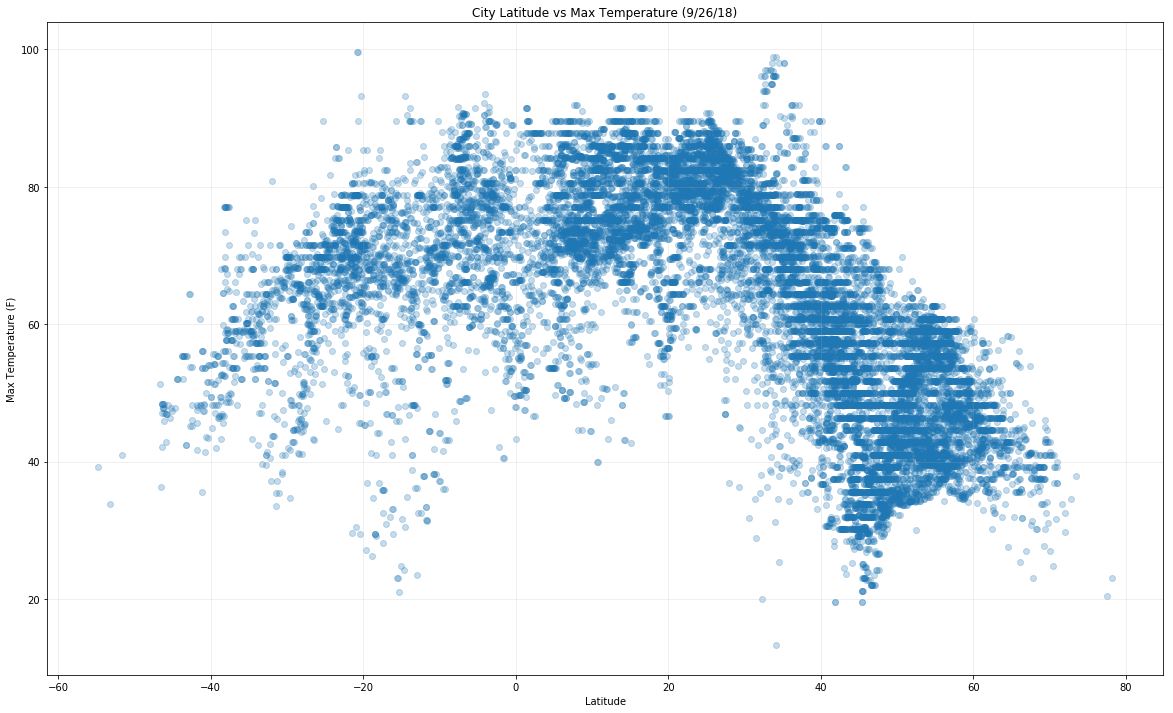

In [41]:
plt.figure(figsize=(20,12))
plt.scatter(df['Latitude'], df['Max Temp'], alpha=.25)
plt.grid(alpha=.25)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (9/26/18)')
plt.savefig("Images/LatvsTemp.png",bbox_inches="tight")

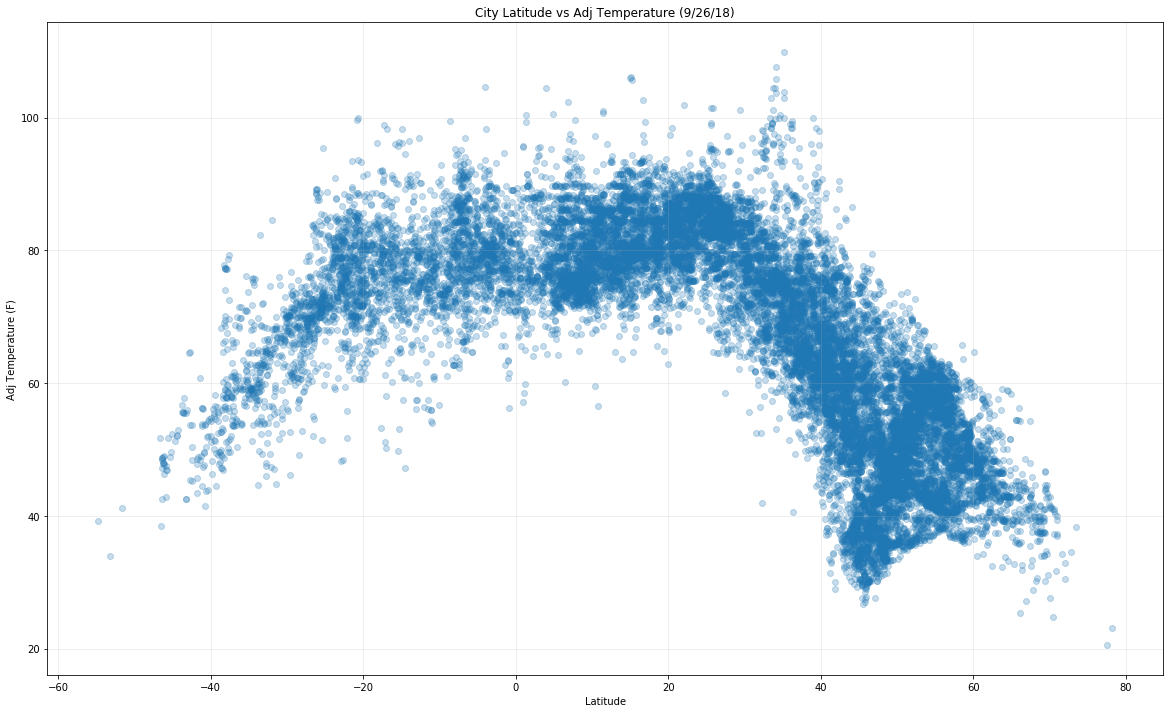

In [42]:
plt.figure(figsize=(20,12))
plt.scatter(df['Latitude'], df['Adj Temp'], alpha=.25)
plt.grid(alpha=.25)
plt.xlabel('Latitude')
plt.ylabel('Adj Temperature (F)')
plt.title('City Latitude vs Adj Temperature (9/26/18)')
plt.savefig("Images/LatvsAdjTemp.png",bbox_inches="tight")

#### Latitude vs. Humidity Plot

In [43]:
# Because apparently places exist on the earth where humidity = 290%...
ndf = df.drop(df[df.Humidity > 100].index)
# ndf = ndf.loc[df.Humidity <= 100]
ndf.head()

,City,Country,Latitude,Longitude,Elevation,Max Temp,Humidity,Wind Speed,Cloudiness,Date,Adj Temp,Elevation (ft)
0,Kapaa,US,22.08,-159.32,5.70595,82.04,84,9.17,75,1538013360,82.1055,18.7203
1,Faanui,PF,-16.48,-151.75,35.4347,78.63,100,14.81,20,1538015865,79.0369,116.256
2,Adrar,DZ,27.87,-0.29,255.784,80.6,36,21.92,0,1538013600,83.5372,839.187
3,Yellowknife,CA,62.45,-114.38,199.079,30.2,54,16.11,90,1538013600,32.486,653.146
4,Albany,AU,-35.02,117.88,45.3894,57.21,75,8.21,32,1538015866,57.7312,148.915


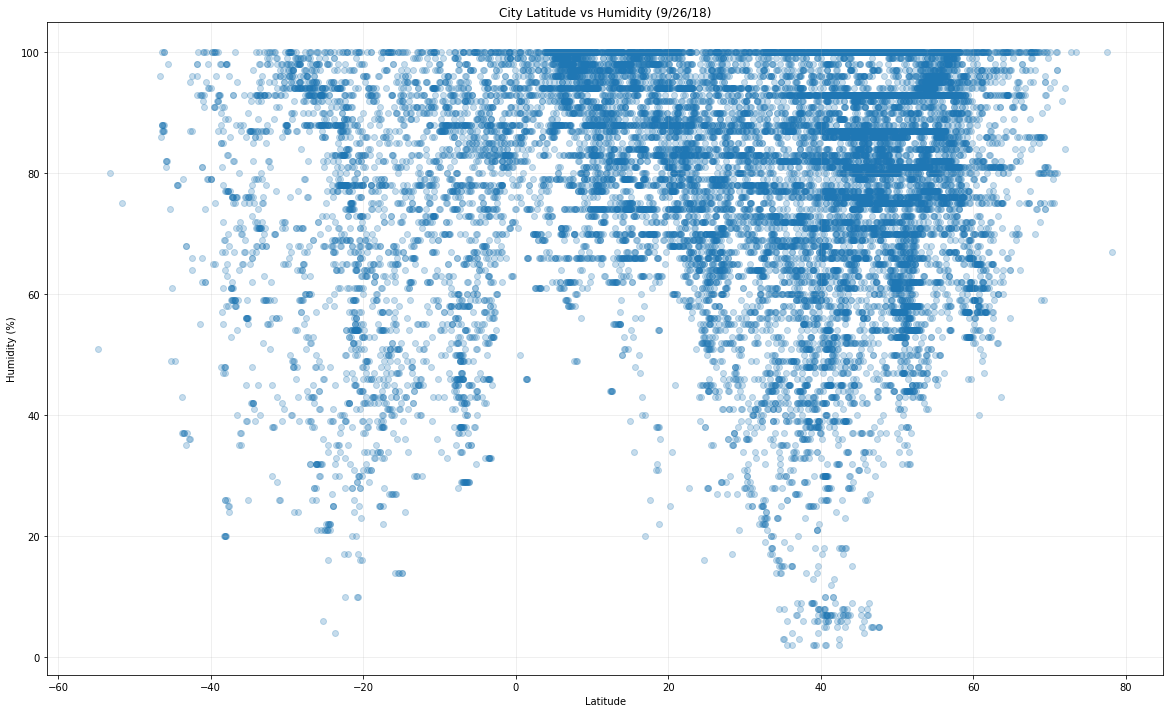

In [44]:
plt.figure(figsize=(20,12))
plt.scatter(ndf['Latitude'],ndf['Humidity'], alpha=.25)
plt.grid(alpha=.25)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (9/26/18)')
plt.savefig("Images/LatvsHum.png",bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

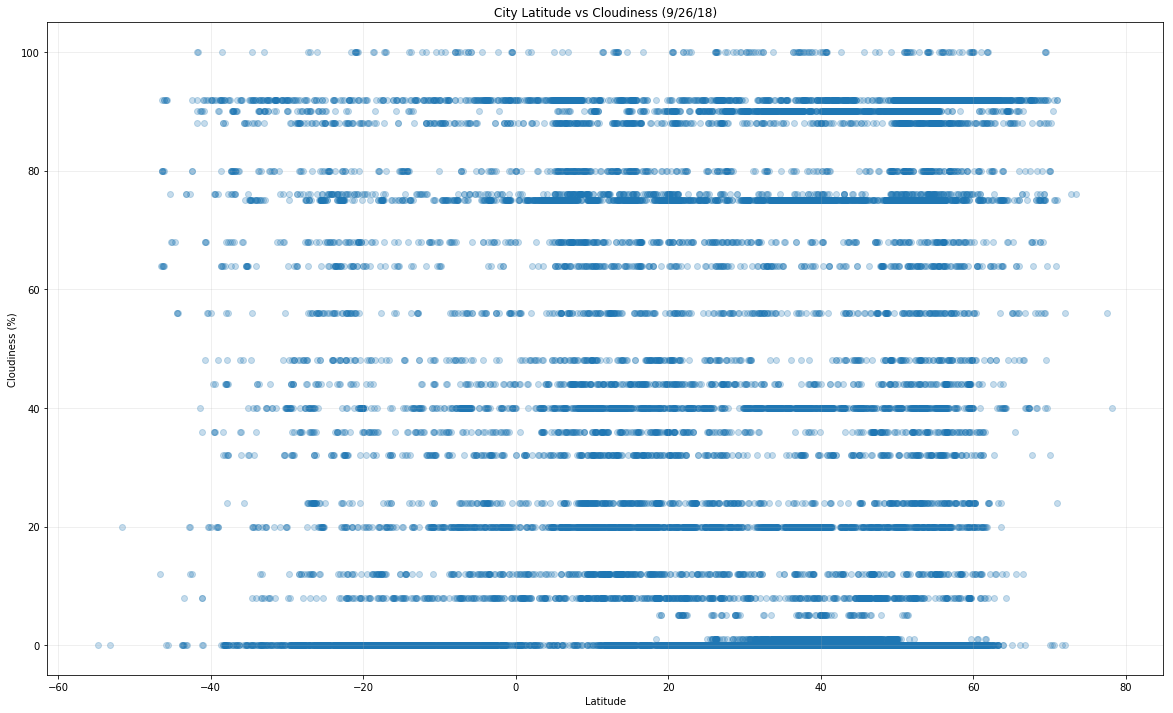

In [45]:
plt.figure(figsize=(20,12))
plt.scatter(df['Latitude'],df['Cloudiness'], alpha=.25)
plt.grid(alpha=.25)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (9/26/18)')
plt.savefig("Images/LatvsCloud.png",bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

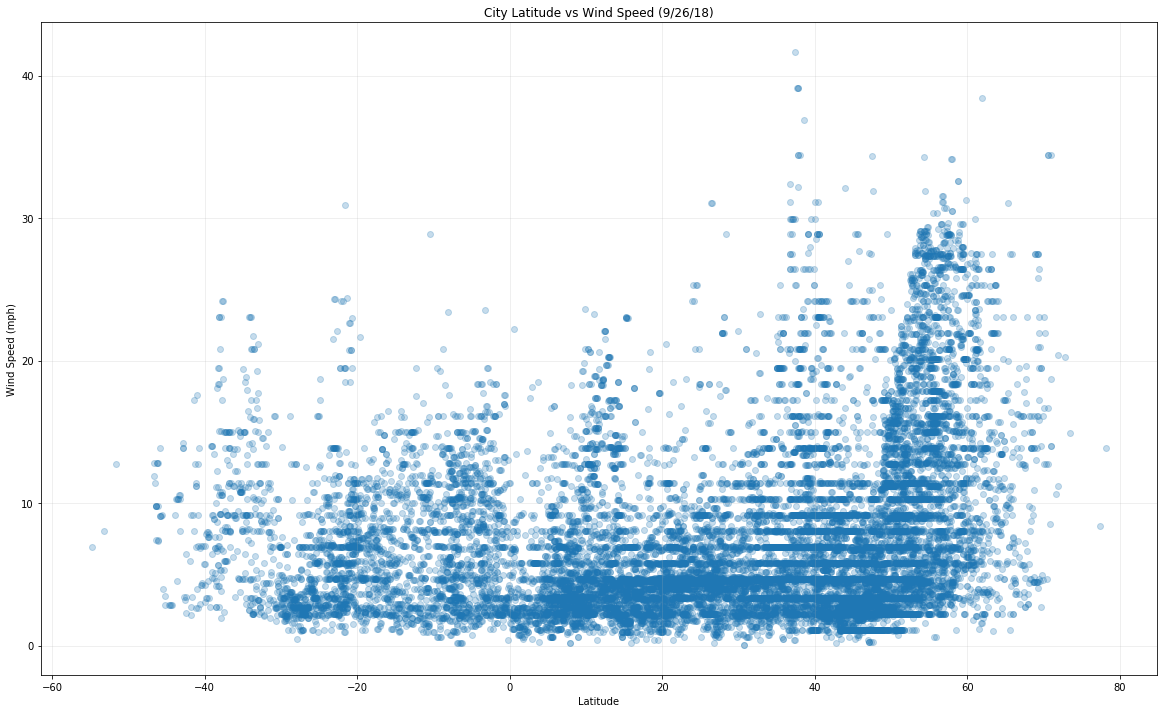

In [46]:
plt.figure(figsize=(20,12))
plt.scatter(df['Latitude'],df['Wind Speed'], alpha=.25)
plt.grid(alpha=.25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (9/26/18)')
plt.savefig("Images/LatvsWind.png",bbox_inches="tight")